#### Importing the Necessary Python Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
sns.set(color_codes=True)
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings("ignore")
from scipy.stats import stats

#### Problem Statement 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


#### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

#### * EDA - Data Description , Data Preprocessing , Data Visualization.

#### Loading the Dataset CSV file of Problem Statement 1.

In [2]:
df_1=pd.read_csv("cubic_zirconia.csv")

#### Checking the Records of the Dataset.

##### * Head of the Dataset - First 10 Records of the Dataset.

In [3]:
df_1.head(10) 

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


##### * Tail of the Dataset - Last 10 Rows of the Dataset.

In [4]:
df_1.tail(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26957,26958,2.09,Premium,H,SI2,60.6,59.0,8.27,8.22,5.00,17805
26958,26959,1.37,Premium,E,SI2,61.0,57.0,7.25,7.19,4.40,6751
26959,26960,1.05,Very Good,E,SI2,63.2,59.0,6.43,6.36,4.04,4281
26960,26961,1.10,Very Good,D,SI2,NaN,63.0,6.76,6.69,3.94,4361
26961,26962,0.25,Premium,F,VVS2,62.0,59.0,4.04,3.99,2.49,740
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


#### Dropping the Unnamed: 0 Column.

* We are going to drop the column unnamed:0 as it is useless for the model.

In [5]:
df_1.drop("Unnamed: 0",axis=1,inplace=True)



In [6]:
df_1.head(10) #Head of the Dataset after dropping the " Unnamed: 0 " column.

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [7]:
df_1.tail(10) #Tail of the Dataset after dropping the " Unnamed: 0 " column.

,carat,cut,color,clarity,depth,table,x,y,z,price
26957,2.09,Premium,H,SI2,60.6,59.0,8.27,8.22,5.00,17805
26958,1.37,Premium,E,SI2,61.0,57.0,7.25,7.19,4.40,6751
26959,1.05,Very Good,E,SI2,63.2,59.0,6.43,6.36,4.04,4281
26960,1.10,Very Good,D,SI2,NaN,63.0,6.76,6.69,3.94,4361
26961,0.25,Premium,F,VVS2,62.0,59.0,4.04,3.99,2.49,740
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


#### Insights

* Now we have all the columns which are useful for the model.

#### Data Dictionary for Problem Statement 1.

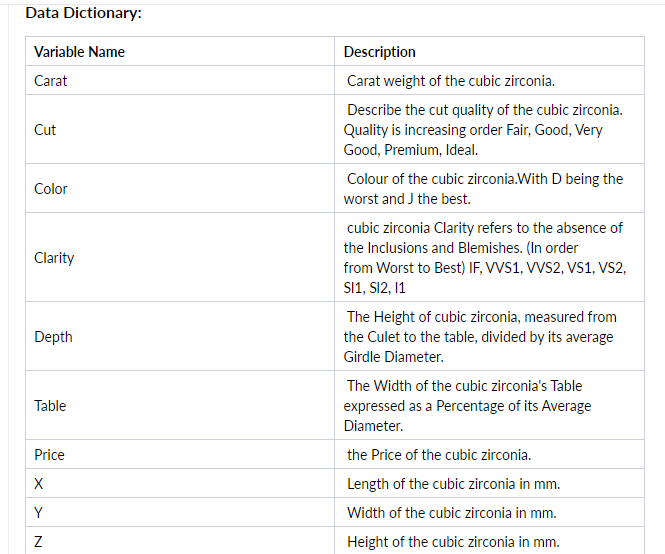

In [8]:
from IPython.display import Image
Image(filename="Data Dictionary Problem 1.png")

#### Checking the Summary of the Dataset.

In [9]:
df_1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


#### Insights

* From the above table we can infer the count,mean, std , 25% , 50% ,75% and min & max values of the all numeric variables present in the dataset.

* From the above table we can infer the count,unique,top,freq of all the categorical variables present in the dataset. 

* There is bad values found in the x , y , z columns of the Dataset. As x , y , z are the length , width & height of the cubic zirconia in mm and we have found minimum value of x , y , z is zero which doesnot make sense. As we know that length , width , height can't be zero. Thus, we need to treat & clean them.


#### Checking the Shape of the Dataframe.

In [10]:
df_1.shape

(26967, 10)

#### Insights

* Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The cubic_zirconia.csv data set has 26967 observations (rows) and 10 variables (columns) in the dataset.

#### Checking the Appropriateness of Datatypes & Information of the Dataframe.

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


#### Insights

* From the above results we can see that there is  null values present in the depth column of the dataset.Their are total 26967 rows & 10 columns in this dataset,indexed from 0 to 26966. Out of 10 variables 6 are float64 , 3 variables are object and 1 variable is int64. Memory used by the dataset: 2.1+ MB.

#### Checking for Null Values.

In [12]:
df_1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [13]:
df_1["depth"].isnull().sum()

697

#### Insights

* From the above output we infer that only depth have null values.

* 697 null values are present in the depth column.

#### Checking for Anomalies in the Dataset.

In [14]:
df_1["carat"].unique()

array([0.3 , 0.33, 0.9 , 0.42, 0.31, 1.02, 1.01, 0.5 , 1.21, 0.35, 0.32,
       1.1 , 0.71, 1.5 , 0.34, 0.54, 1.04, 0.4 , 1.52, 1.19, 0.66, 0.52,
       0.72, 0.77, 0.51, 1.26, 1.55, 1.58, 0.43, 2.  , 0.73, 1.14, 0.78,
       0.91, 0.27, 1.8 , 1.13, 0.38, 0.57, 0.44, 0.7 , 1.22, 0.59, 1.2 ,
       2.16, 1.68, 0.76, 0.74, 0.41, 1.51, 1.69, 1.3 , 1.  , 0.28, 0.55,
       1.39, 0.36, 0.23, 1.37, 0.81, 2.02, 2.8 , 1.56, 2.2 , 0.75, 1.71,
       1.11, 0.92, 1.45, 1.16, 0.58, 0.97, 1.03, 0.26, 1.53, 1.63, 0.96,
       1.24, 0.39, 0.61, 0.24, 2.01, 1.7 , 0.79, 0.67, 1.28, 0.25, 0.56,
       1.09, 2.11, 1.17, 0.82, 0.53, 0.46, 2.43, 1.65, 0.84, 1.74, 0.8 ,
       1.83, 1.25, 1.15, 0.6 , 1.06, 0.29, 1.05, 1.18, 2.27, 2.36, 1.07,
       0.95, 0.93, 2.48, 1.23, 2.03, 1.27, 0.83, 1.43, 0.45, 1.12, 1.59,
       0.62, 1.61, 2.04, 1.33, 0.37, 1.35, 1.6 , 3.04, 1.57, 2.14, 0.94,
       0.49, 1.49, 1.76, 2.1 , 1.78, 1.34, 1.38, 2.33, 2.51, 2.05, 0.87,
       1.79, 1.73, 0.69, 1.32, 1.86, 2.61, 1.72, 1.

In [15]:
df_1["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [16]:
df_1["color"].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [17]:
df_1["clarity"].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [18]:
df_1["depth"].unique()

array([62.1, 60.8, 62.2, 61.6, 60.4, 61.5, 63.7, 63.8, 60.5, 60.7, 61.1,
       66.2, 61.2, 59.8, 61.9, 60. , 62.9, 62.7, 61.7, 62.4, 61.4,  nan,
       64. , 62.3, 63. , 59.9, 62.8, 61.3, 62. , 61. , 63.9, 62.6, 62.5,
       61.8, 58. , 64.9, 60.9, 59.7, 63.2, 58.4, 59.4, 63.5, 63.1, 66.8,
       65.2, 60.6, 64.3, 60.2, 60.3, 65.5, 58.5, 68.3, 66.5, 63.3, 58.8,
       63.6, 63.4, 57.5, 59. , 58.7, 59.1, 64.1, 64.5, 64.4, 60.1, 57.6,
       70.6, 59.2, 59.3, 50.8, 58.9, 65.4, 58.6, 59.5, 56.7, 67. , 66. ,
       54.6, 59.6, 64.7, 66.9, 64.6, 64.8, 58.2, 57.9, 56.9, 66.4, 65. ,
       66.6, 57.4, 64.2, 58.1, 67.7, 55.2, 66.3, 65.3, 67.9, 67.6, 65.8,
       67.1, 65.1, 67.5, 56.6, 55.9, 57.3, 57.1, 57.8, 58.3, 65.7, 57.2,
       52.7, 56.1, 66.1, 56.3, 66.7, 54.7, 71.3, 67.3, 65.9, 71. , 57.7,
       53.4, 65.6, 56. , 68.9, 68.8, 55.3, 69.2, 53.1, 69.8, 56.5, 56.2,
       55.1, 55.5, 53.2, 56.8, 68.4, 67.8, 55.6, 67.2, 57. , 69. , 55.8,
       52.2, 53.8, 68.6, 68. , 68.7, 68.5, 70.2, 56

In [19]:
df_1["table"].unique()

array([58. , 60. , 56. , 59. , 62. , 64. , 57. , 55. , 58.2, 53. , 61. ,
       54. , 55.7, 63. , 60.3, 65. , 54.7, 54.2, 66. , 62.2, 57.8, 60.4,
       53.8, 55.4, 54.3, 51. , 67. , 55.8, 55.1, 54.8, 56.7, 56.9, 53.4,
       60.1, 68. , 55.5, 55.2, 56.5, 56.1, 58.9, 62.3, 70. , 57.2, 57.6,
       60.2, 53.6, 53.1, 58.5, 55.9, 56.2, 52. , 59.4, 54.5, 55.6, 58.4,
       56.4, 57.4, 54.4, 53.7, 54.1, 54.9, 58.7, 53.2, 79. , 59.3, 53.3,
       53.9, 60.7, 76. , 59.9, 59.6, 58.3, 55.3, 61.6, 60.5, 57.7, 58.1,
       57.1, 60.8, 69. , 49. , 64.2, 50. , 61.5, 56.6, 58.6, 60.9, 56.8,
       57.5, 54.6, 62.8, 51.6, 56.3, 60.6, 57.9, 59.1, 62.5, 53.5, 59.8,
       59.7, 50.1, 61.8, 63.3, 58.8, 59.2, 57.3, 61.4, 62.6, 61.9, 64.3,
       62.1, 61.2])

In [20]:
df_1["x"].unique()

array([ 4.27,  4.42,  6.04,  4.82,  4.35,  6.46,  6.35,  5.09,  6.72,
        4.52,  4.4 ,  6.74,  5.08,  5.74,  7.12,  4.37,  4.56,  6.52,
        6.  ,  5.42,  6.54,  4.72,  7.35,  6.8 ,  5.53,  7.4 ,  4.5 ,
        5.18,  4.38,  5.65,  6.76,  5.7 ,  4.3 ,  5.95,  4.61,  6.82,
        5.16,  6.9 ,  7.42,  6.05,  4.88,  4.32,  8.01,  6.42,  4.85,
        5.21,  5.75,  6.71,  5.83,  6.14,  5.12,  6.88,  4.89,  6.44,
        5.13,  4.22,  7.81,  4.28,  6.79,  4.64,  5.36,  4.25,  5.23,
        4.9 ,  5.91,  5.39,  5.37,  5.11,  8.29,  4.39,  7.6 ,  6.08,
        4.81,  5.85,  5.92,  6.86,  4.75,  4.34,  5.06,  5.24,  4.77,
        7.3 ,  5.07,  4.47,  6.24,  5.71,  5.15,  5.02,  6.25,  5.57,
        7.59,  7.01,  6.93,  6.56,  4.2 ,  6.31,  5.31,  7.18,  4.59,
        4.03,  7.11,  5.97,  6.4 ,  8.05,  7.72,  6.01,  9.03,  6.19,
        5.76,  5.35,  4.8 ,  7.44,  4.26,  8.54,  6.15,  5.8 ,  4.78,
        4.76,  4.74,  7.65,  6.5 ,  6.06,  6.66,  6.22,  7.14,  6.78,
        6.45,  5.69,

In [21]:
df_1["y"].unique()

array([ 4.29,  4.46,  6.12,  4.8 ,  4.43,  6.49,  6.3 ,  5.06,  6.63,
        4.6 ,  6.71,  5.12,  5.76,  7.08,  4.39,  4.53,  6.09,  5.22,
        6.51,  4.69,  7.28,  6.85,  5.56,  7.25,  4.44,  5.2 ,  4.35,
        5.59,  6.81,  5.72,  4.32,  5.9 ,  4.64,  6.43,  5.11,  6.93,
        7.47,  6.02,  7.38,  4.84,  4.34,  7.91,  4.78,  5.23,  5.81,
        5.19,  5.18,  6.68,  5.8 ,  4.85,  6.22,  6.47,  5.15,  6.8 ,
        4.94,  6.37,  5.1 ,  4.17,  7.89,  4.3 ,  6.7 ,  5.3 ,  5.17,
        4.41,  5.44,  4.93,  5.16,  5.83,  5.42,  6.83,  5.4 ,  8.22,
        4.42,  4.77,  7.54,  6.17,  4.87,  5.88,  5.97,  4.72,  4.37,
        5.08,  4.82,  7.35,  4.5 ,  6.16,  5.75,  6.18,  5.54,  7.66,
        7.05,  4.4 ,  6.94,  6.52,  4.25,  6.34,  4.81,  5.41,  7.14,
        4.62,  4.07,  7.04,  5.95,  6.36,  8.11,  4.51,  8.98,  6.13,
        5.33,  4.24,  4.83,  7.4 ,  4.33,  8.49,  5.79,  6.24,  5.82,
        5.14,  4.75,  4.74,  4.76,  4.52,  7.58,  6.44,  5.43,  6.61,
        6.11,  6.25,

In [22]:
df_1["z"].unique()

array([ 2.66,  2.7 ,  3.78,  2.96,  2.65,  3.99,  4.03,  3.12,  4.26,
        2.76,  2.72,  4.08,  3.11,  3.54,  4.7 ,  2.78,  3.89,  3.74,
        3.19,  4.59,  4.21,  3.46,  4.49,  2.74,  3.6 ,  4.23,  2.69,
        2.77,  4.22,  4.01,  3.15,  4.29,  4.54,  3.85,  4.61,  2.94,
        2.67,  5.09,  3.01,  3.22,  3.59,  3.2 ,  4.11,  3.63,  4.02,
        3.27,  3.95,  2.58,  4.88,  2.85,  3.18,  2.73,  3.3 ,  2.99,
        3.21,  3.43,  4.25,  3.34,  4.2 ,  5.14,  2.92,  3.64,  3.52,
        4.32,  3.16,  3.24,  4.52,  3.1 ,  3.82,  3.62,  4.15,  4.74,
        2.68,  3.96,  2.62,  4.07,  2.97,  4.44,  2.81,  2.43,  4.36,
        3.69,  4.  ,  5.04,  4.67,  5.5 ,  3.77,  2.91,  2.64,  5.1 ,
        3.57,  3.81,  3.61,  3.09,  2.79,  4.8 ,  3.9 ,  3.84,  4.09,
        3.8 ,  4.16,  3.48,  3.33,  2.52,  3.73,  2.71,  3.71,  3.47,
        3.55,  3.25,  4.66,  3.66,  2.95,  3.37,  3.56,  3.86,  2.49,
        2.48,  4.05,  3.87,  4.85,  3.17,  4.58,  4.5 ,  4.24,  2.47,
        4.71,  3.  ,

In [23]:
df_1["price"].unique()

array([ 499,  984, 6289, ..., 8771, 3649, 6751])

#### Observations

* No Anomalies found in the Dataset.

#### Checking the Value counts on all the Categorical Column.

In [24]:
df_1["cut"].value_counts()

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

#### Insights

* As per the given Data Dictionary there are 5 cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

* 10816 cubic zirconia are of the Ideal cut quality.

* 6899 cubic zirconia are of the Premium cut quality.

* 6030 cubic zirconia are of the Very Good cut quality.

* 2441 cubic zirconia are of the Good cut quality.

* 781  cubic zirconia are of the Fair cut quality.






In [26]:
df_1["color"].value_counts()

G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64

#### Insights

* As per the given Data Dictionary color of the cubic zirconia ranges from D to J.  
  D being the worst and J the best color.

* 1443 cubic zirconia are of the best color.

* 3343 cubic zirconia are of the wrost color.

 

In [27]:
df_1["clarity"].value_counts()

SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64

#### Insights

* As per the given Data Dictionary cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes (In order from Worst to Best) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, I1.

* 891 cubic zirconia are of IF clarity.

* 1839 cubic zirconia are of VVS1 clarity.

* 2530 cubic zirconia are of VVS2 clarity.

* 4087 cubic zirconia are of VS1 clarity.

* 6093 cubic zirconia are of VS2 clarity.

* 6565 cubic zirconia are of SI1 clarity.

* 4564 cubic zirconia are of SI2 clarity.

* 364 cubic zirconia are of I1 clarity.









#### Observation

* There is no missing value & bad value present in the above categorical variables.

#### Checking of Bad Values

#### 1.Checking of bad values present in x (length of the cubic zirconia in mm).

* As we found that x min value found to be inappropirate , so we need cleaned that.We know that min value for length of of the cubic zirconia in mm can't be 0. But in x (length of the cubic zirconia in mm.) we found min value of 0 (zero) this has to be cleaned.

In [28]:
df_1[df_1['x']==0] 

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


* From above records we observe that '0' in x has been enterd maybe because the data was not available or by mistake of data entry operator. However, this data has to be imputed. We can either impute it with mean/median value or make some assumption.

#### 2.Checking of bad values present in y (width of the cubic zirconia in mm).

* As we found that y min value found to be inappropirate , so we need cleaned that.We know that min value for width of of the cubic zirconia in mm can't be 0. But in y (width of the cubic zirconia in mm.) we found min value of 0 (zero) this has to be cleaned.

In [29]:
df_1[df_1["y"]==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


* From above records we observe that '0' in y has been enterd maybe because the data was not available or by mistake of data entry operator. However, this data has to be imputed. We can either impute it with mean/median value or make some assumption.

#### 3.Checking of bad values present in z (height of the cubic zirconia in mm).

* As we found that z min value found to be inappropirate , so we need cleaned that.We know that min value for height of of the cubic zirconia in mm can't be 0. But in z (width of the cubic zirconia in mm.) we found min value of 0 (zero) this has to be cleaned.

In [30]:
df_1[df_1["z"]==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


* From above records we observe that '0' in z has been enterd maybe because the data was not available or by mistake of data entry operator. However, this data has to be imputed. We can either impute it with mean/median value or make some assumption.

#### Conclusion :

*  Here we infer that x(length),y(width) & z(height) have zero as min value.we observe that '0' in x(length),y(width) & z(height)  has been enterd maybe because the data was not available or by mistake of data entry operator. However, this data has to be imputed.

* As per the instruction we are going to impute bad value (0)  for x(length),y(width) & z(height) with median in Question 1.2.So we are going to impute the zero present in x(length),y(width) & z(height) down the line.

#### Checking Duplicate Values.

In [31]:
dups= df_1.duplicated()
print("Number of Duplicated Row in the Dataset = %d" %(dups.sum()))



Number of Duplicated Row in the Dataset = 34


In [32]:
print('Before',df_1.shape)
df_1.drop_duplicates(inplace=True) 
print('After',df_1.shape)

Before (26967, 10)
After (26933, 10)


In [33]:
dups = df_1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


#### Insights:

* We have successfully dropped the duplicated rows , now we donot have any duplicated row in the dataset. 

#### Univariate Analysis of Numerical Variables.

* A histogram takes as input a numeric variable only. The variable is cut into several bins, and the number of observation per bin is represented by the height of the bar. It is possible to represent the distribution of several variable on the same axis using this technique.


* A boxplot gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines show the highest and lowest value excluding outliers.

<AxesSubplot:xlabel='carat'>

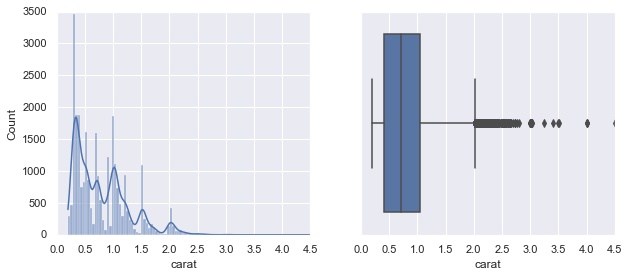

In [34]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_1['carat'], kde=True, ax=axes[0])
sns.boxplot(x='carat', data=df_1, ax=axes[1])




In [35]:
df_1["carat"].describe().T

count    26933.000000
mean         0.798010
std          0.477237
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64

In [36]:
stats.skew(df_1.carat)

1.114727014791487

#### Insight

* Carat: weight of the cubic zirconia ranges from a minimum of 0.200 to maximum of 4.500.
    
* The average Carat: weight of the cubic zirconia is around 0.798.
    
* The standard deviation of the Carat: weight of the cubic zirconia is 0.477.
    
* 25% , 50% (median) and 75 % of the Carat: weight of the cubic zirconia are 0.400 , 0.700 and 1.050.
    
* Skewness indicating that the ditribution is right skewed.

* Carat: weight of the cubic zirconia have outliers.

<AxesSubplot:xlabel='depth'>

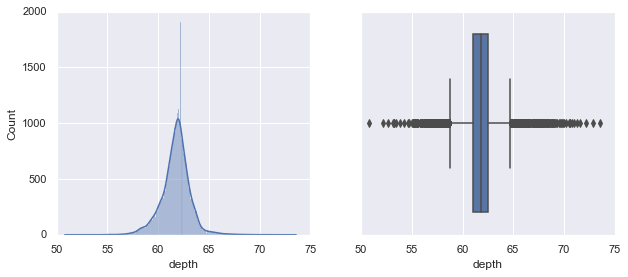

In [37]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_1['depth'], kde=True, ax=axes[0])
sns.boxplot(x='depth', data=df_1, ax=axes[1])




In [38]:
df_1["depth"].describe().T

count    26236.000000
mean        61.745285
std          1.412243
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64

In [39]:
stats.skew(df_1.depth)

nan

#### Insight

* Depth: The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter ranges from a minimum of 50.800 to maximum of 73.600.
    
* The average Depth: The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter is around  61.800.
    
* The standard deviation of the Depth: The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter is 1.412.
    
* 25% , 50% (median) and 75 % of the Depth: The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter are 61.000 , 61.800 and  62.500.
    
* Skewness indicating that the ditribution is normal distributed.

* Depth: The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter have outliers.

<AxesSubplot:xlabel='table'>

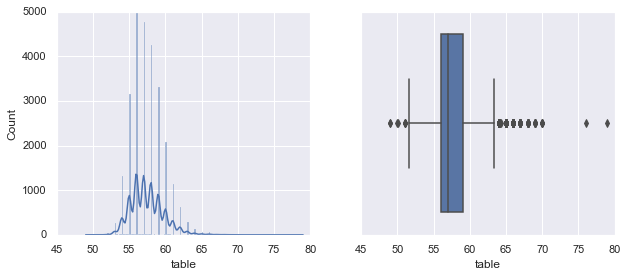

In [40]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_1['table'], kde=True, ax=axes[0])
sns.boxplot(x='table', data=df_1, ax=axes[1])




In [41]:
df_1["table"].describe().T

count    26933.000000
mean        57.455950
std          2.232156
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64

In [42]:
stats.skew(df_1.table)

0.7657624212663035

#### Insight

* Table: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter ranges from a minimum of 49.000 to maximum of 79.000.
    
* The average Table: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter is around 57.455.
    
* The standard deviation of the Table: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter is 2.232.
    
* 25% , 50% (median) and 75 % of the Table: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter are 56.000 ,  57.000 and  59.000.
    
* Skewness indicating that the ditribution is slightly right skewed.

* Table: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter have outliers.

<AxesSubplot:xlabel='x'>

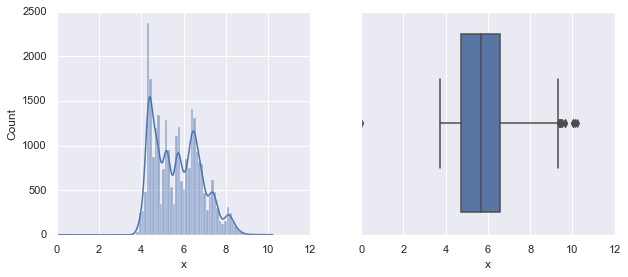

In [43]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_1['x'], kde=True, ax=axes[0])
sns.boxplot(x='x', data=df_1, ax=axes[1])




In [44]:
df_1["x"].describe().T

count    26933.000000
mean         5.729346
std          1.127367
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64

In [45]:
stats.skew(df_1.x)

0.3922679825424859

#### Insight

* X: Length of the cubic zirconia in mm ranges from a minimum of  0 to maximum of  10.230.
    
* The average X: Length of the cubic zirconia in mm is around 5.729.
    
* The standard deviation of the X: Length of the cubic zirconia in mm is 1.126.
    
* 25% , 50% (median) and 75 % of the X: Length of the cubic zirconia in mm are  4.710 ,  5.690 and  6.550.
    
* Skewness indicating that the ditribution is slightly right skewed.

* X: Length of the cubic zirconia in mm have outliers.

<AxesSubplot:xlabel='y'>

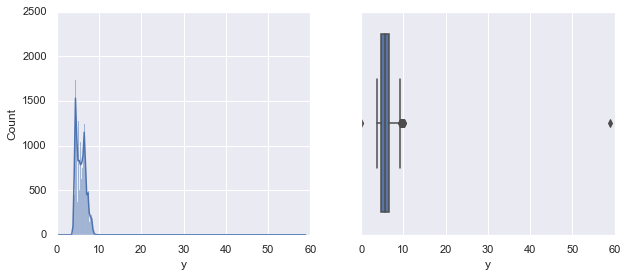

In [46]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_1['y'], kde=True, ax=axes[0])
sns.boxplot(x='y', data=df_1, ax=axes[1])




In [47]:
df_1["y"].describe().T

count    26933.000000
mean         5.733102
std          1.165037
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         58.900000
Name: y, dtype: float64

In [48]:
stats.skew(df_1.y)

3.867548673410656

#### Insights

*  Y: Width of the cubic zirconia in mm ranges from a minimum of 0 to maximum of   58.900.
    
* The average Y: Width of the cubic zirconia in mm is around  5.733.
    
* The standard deviation of the Y: Width of the cubic zirconia in mm is  1.163.
    
* 25% , 50% (median) and 75 % of the Y: Width of the cubic zirconia in mm are   4.720 ,  5.700 and   6.540.
    
* Skewness indicating that the ditribution is right skewed.

* Y: Width of the cubic zirconia in mm have outliers.

<AxesSubplot:xlabel='z'>

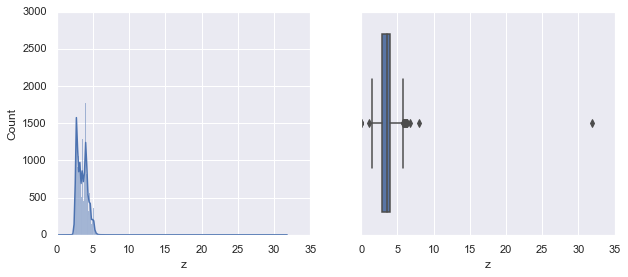

In [49]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_1['z'], kde=True, ax=axes[0])
sns.boxplot(x='z', data=df_1, ax=axes[1])




In [50]:
df_1["z"].describe().T

count    26933.000000
mean         3.537769
std          0.719964
min          0.000000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64

In [51]:
stats.skew(df_1.z)

2.5805209384040535

#### Insights

*  Z: Height of the cubic zirconia in mm ranges from a minimum of 0 to maximum of   31.800.
    
* The average Z: Height of the cubic zirconia in mm is around  3.538.
    
* The standard deviation of the Z: Height of the cubic zirconia in mm is 0.717.
    
* 25% , 50% (median) and 75 % of the Z: Height of the cubic zirconia in mm are  2.900 ,  3.520 and  4.040.
    
* Skewness indicating that the ditribution is right skewed.

* Z: Height of the cubic zirconia in mm have outliers.

<AxesSubplot:xlabel='price'>

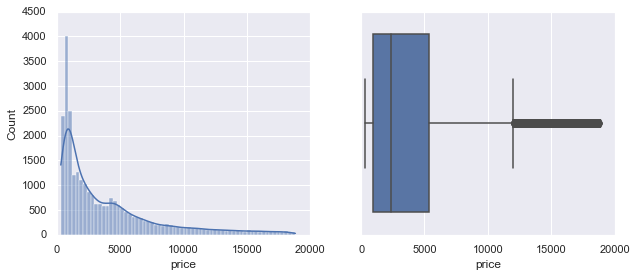

In [52]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_1['price'], kde=True, ax=axes[0])
sns.boxplot(x='price', data=df_1, ax=axes[1])




In [53]:
df_1["price"].describe().T

count    26933.000000
mean      3937.526120
std       4022.551862
min        326.000000
25%        945.000000
50%       2375.000000
75%       5356.000000
max      18818.000000
Name: price, dtype: float64

In [54]:
stats.skew(df_1.price)

1.6190253501299428

#### Insights

*  Price:The Price of the cubic zirconia ranges from a minimum of  326.00 to maximum of   18818.00.
    
* The average Price: The Price of the cubic zirconia is around 3937.526.
    
* The standard deviation of the Price: The Price of the cubic zirconia is 4022.55.
    
* 25% , 50% (median) and 75 % of the Price: The Price of the cubic zirconia are  945.00 ,  2375.00 and 5356.00.
    
* Skewness indicating that the ditribution is right skewed.

* Price: The Price of the cubic zirconia have outliers.

#### Univariate Analysis of Categorical Variables.

#### * Countplot

A countplot is kind of like a histogram or a bar graph for categorical variables.

#### * Piechart

A pie chart is a circle divided into sectors that each represent a proportion of the whole. It is often used to show proportion, where the sum of the sectors equal 100%.

In [55]:
df_1["cut"].value_counts(normalize=True)

Ideal        0.401181
Premium      0.255671
Very Good    0.223778
Good         0.090410
Fair         0.028961
Name: cut, dtype: float64

<AxesSubplot:xlabel='cut', ylabel='count'>

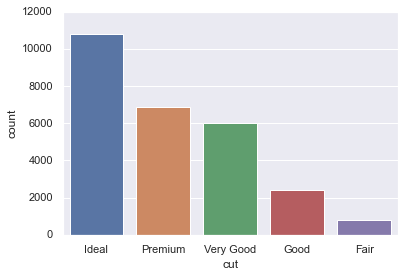

In [56]:
sns.countplot(x='cut', data=df_1)

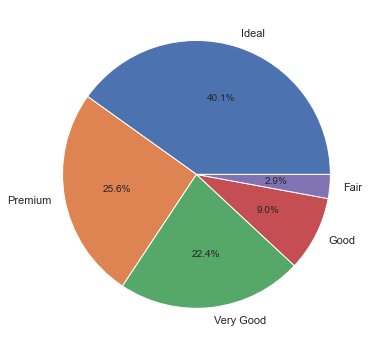

In [57]:
plt.figure(figsize=(10,6))
plt.pie(df_1["cut"].value_counts(),labels=df_1["cut"].value_counts().index,autopct='%1.1f%%')
plt.show()

#### Insights

* There are 5 type of cut quality of the cubic zirconia present in the data set named as 'Ideal' , 'Premium' , 'Very Good' , 'Good' & 'Fair'.

* Cut Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

* 40.11% cubic zirconia have Ideal cut quality which is the max among all 5 cut quality present in the data.

* 25.6% cubic zirconia have Premium cut quality.

* 22.4% cubic zirconia have Very Good cut quality.

* 9.0%  cubic zirconia have  Good cut quality.

* Only 2.9% cubic zirconia have Fair cut quality which is the min among all 5 cut quality present in the data.

In [58]:
df_1["color"].value_counts(normalize=True)

G    0.209891
E    0.182527
F    0.175361
H    0.152044
D    0.124049
I    0.102662
J    0.053466
Name: color, dtype: float64

<AxesSubplot:xlabel='color', ylabel='count'>

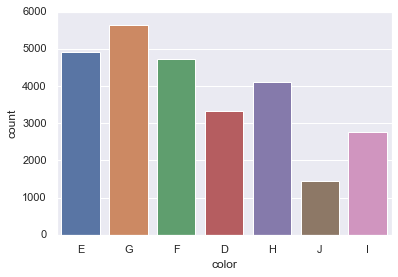

In [59]:
sns.countplot(x='color', data=df_1)

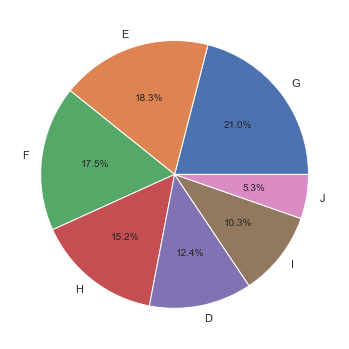

In [60]:
plt.figure(figsize=(10,6))
plt.pie(df_1["color"].value_counts(),labels=df_1["color"].value_counts().index,autopct='%1.1f%%')
plt.show()

#### Insights

* There are 7 type of colour of the cubic zirconia present in the data set named as 'D' , 'E' , 'F' , 'G' , 'H' , 'I' & 'J'.

* With D being the worst and J the best.

* 21% cubic zirconia are of G color which is the max among all 7 color present in the data.

* 18.3% cubic zirconia are of E color.

* 17.5% cubic zirconia are of F color.

* 15.2% cubic zirconia are of H color.

* 12.4% cubic zirconia are of D color.

* 10.3% cubic zirconia are of I color.

* 5.3% cubic zirconia are of J color which is the min among all 7 color present in the data.

In [61]:
df_1["clarity"].value_counts(normalize=True)

SI1     0.243753
VS2     0.226228
SI2     0.169458
VS1     0.151747
VVS2    0.093937
VVS1    0.068281
IF      0.033082
I1      0.013515
Name: clarity, dtype: float64

<AxesSubplot:xlabel='clarity', ylabel='count'>

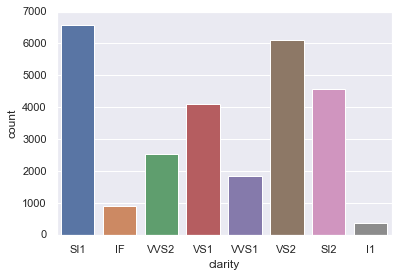

In [62]:
sns.countplot(x='clarity', data=df_1)

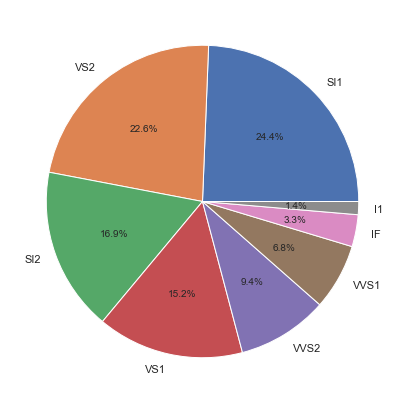

In [63]:
plt.figure(figsize=(12,7))
plt.pie(df_1["clarity"].value_counts(),labels=df_1["clarity"].value_counts().index,autopct='%1.1f%%')
plt.show()

#### Insights

* There are 8 type of clarity of the cubic zirconia present in the data set named as 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'.

*  cubic zirconia clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best) IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1.

* 24.4% of cubic zirconia are of SI1 clarity which is the max among all 8 clarity quality present in the data.

* 22.6% of cubic zirconia are of VS2 clarity.

* 16.9% of cubic zirconia are of SI2 clarity.

* 15.2% of cubic zirconia are of VS1 clarity.

* 9.4% of cubic zirconia are of VVS2  clarity.

* 6.8% of cubic zirconia are of VVS1 clarity.

* 3.3% of cubic zirconia are of IF clarity.

* 1.4% of cubic zirconia are of I1 clarity which is the min among all 8 clarity quality present in the data.

#### Bivariant Analysis

#### *Scatter Plot

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

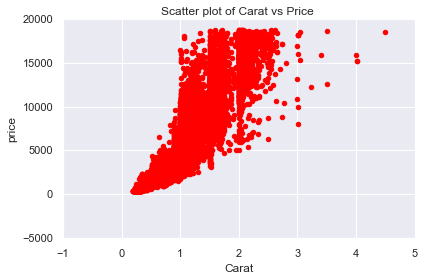

In [64]:
plt.scatter(df_1['carat'],df_1['price'],color="RED")
plt.title("Scatter plot of Carat vs Price ")
plt.xlabel("Carat")
plt.ylabel("price")
plt.tight_layout()
plt.show()

#### Insights

* From the above plot we see that the carat and the price is showing a strong relationship,with increase in carat price is also increases.

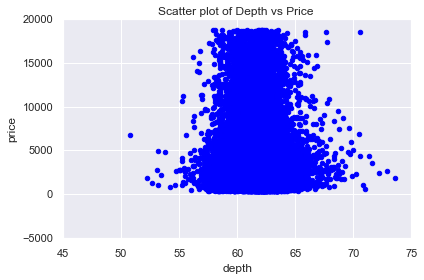

In [65]:
plt.scatter(df_1['depth'],df_1['price'],color="Blue")
plt.title("Scatter plot of Depth vs Price ")
plt.xlabel("depth")
plt.ylabel("price")
plt.tight_layout()
plt.show()

#### Insights

* From the above plot we see that the depth and the price is showing a no relationship as all the datapoints are scatter around its mean.

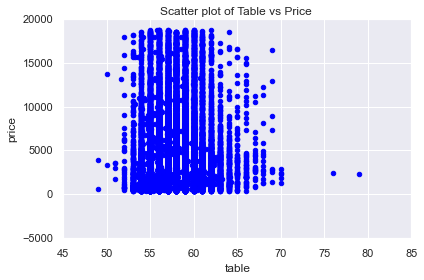

In [66]:
plt.scatter(df_1['table'],df_1['price'],color="Blue")
plt.title("Scatter plot of Table vs Price ")
plt.xlabel("table")
plt.ylabel("price")
plt.tight_layout()
plt.show()

#### Insights

* From the above plot we see that the table and the price is showing a poor relationship.

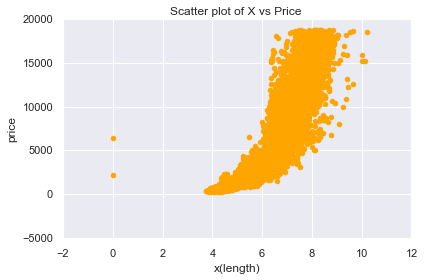

In [67]:
plt.scatter(df_1['x'],df_1['price'],color="orange")
plt.title("Scatter plot of X vs Price ")
plt.xlabel("x(length)")
plt.ylabel("price")
plt.tight_layout()
plt.show()

#### Insights

* From the above plot we see that the x and the price is showing a strong relationship with increase in x price is also increases.

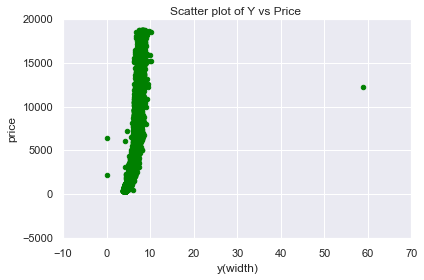

In [68]:
plt.scatter(df_1['y'],df_1['price'],color="green")
plt.title("Scatter plot of Y vs Price ")
plt.xlabel("y(width)")
plt.ylabel("price")
plt.tight_layout()
plt.show()

#### Insights

* From the above plot we see that the y(width) and the price is showing a positive relationship with increase in y(width) price is also increases.

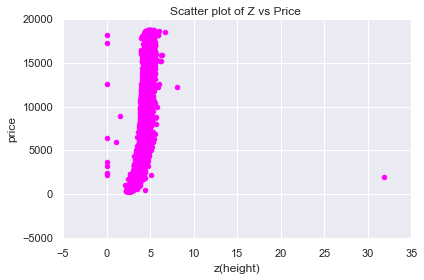

In [69]:
plt.scatter(df_1['z'],df_1['price'],color="magenta")
plt.title("Scatter plot of Z vs Price ")
plt.xlabel("z(height)")
plt.ylabel("price")
plt.tight_layout()
plt.show()

#### Insights

* From the above plot we see that the z(height) and the price is showing a positive relationship with increase in z(height) price is also increases.

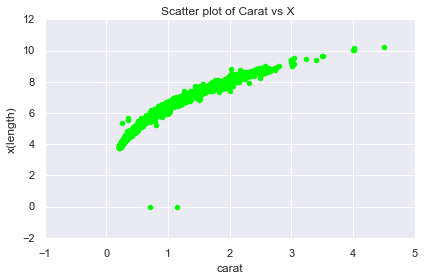

In [70]:
plt.scatter(df_1['carat'],df_1['x'],color="lime")
plt.title("Scatter plot of Carat vs X ")
plt.xlabel("carat")
plt.ylabel("x(length)")
plt.tight_layout()
plt.show()

#### Insights

* From the above plot we see that the carat and the x(lenght) is showing a positive relationship with increase in carat  x(lenght) is also increases.

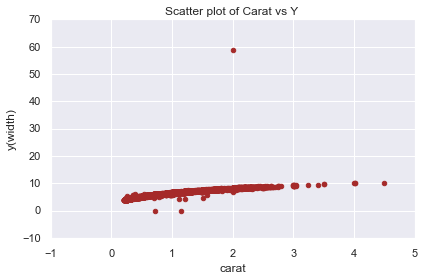

In [71]:
plt.scatter(df_1['carat'],df_1['y'],color="brown")
plt.title("Scatter plot of Carat vs Y ")
plt.xlabel("carat")
plt.ylabel("y(width)")
plt.tight_layout()
plt.show()

#### Insights

* From the above plot we see that the carat and the y(width) is showing a positive relationship with increase in carat y(width) is also increases.

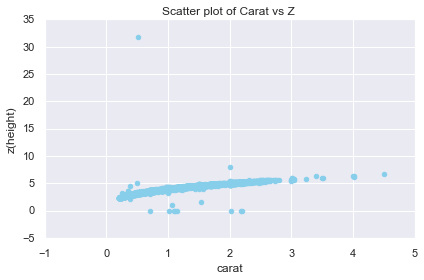

In [72]:
plt.scatter(df_1['carat'],df_1['z'],color="skyblue")
plt.title("Scatter plot of Carat vs Z ")
plt.xlabel("carat")
plt.ylabel("z(height)")
plt.tight_layout()
plt.show()

#### Insights

* From the above plot we see that the carat and the z(height) is showing a positive relationship with increase in carat z(height) is also increases.

#### *Countplot with Hue.

* A countplot is kind of like a histogram or a bar graph for categorical variables.

* Hue :This parameter take column name for colour encoding

<AxesSubplot:xlabel='clarity', ylabel='count'>

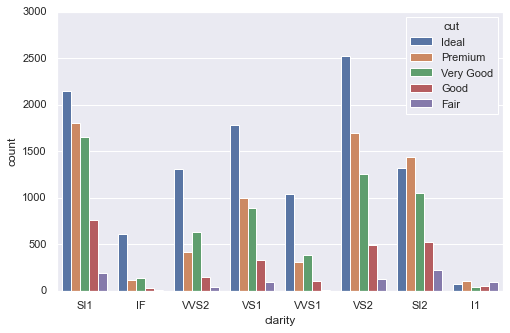

In [73]:
plt.figure(figsize=(8,5))
sns.countplot(x='clarity', hue='cut', data=df_1)

#### Insights

* Note - cubic zirconia clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best) IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1.

*  VS2 clarity cubic zirconia have maximum ideal cut quality.

* I1 clarity cubic zirconia have minimum ideal cut quality.

* SI1 clarity cubic zirconia have maximum premium cut quality.

*  I1 clarity cubic zirconia have minmium premium cut quality.

*  SI1 clarity cubic zirconia have maximum very good cut quality.

*  I1 clarity cubic zirconia have minimum very good cut quality.

*  SI1 clarity cubic zirconia have maximum good cut quality.

*  IF clarity cubic zirconia have minimum good cut quality.

*  SI2 clarity cubic zirconia have maximum fair cut quality.

*  IF clarity cubic zirconia have minimum fair cut quality.

<AxesSubplot:xlabel='color', ylabel='count'>

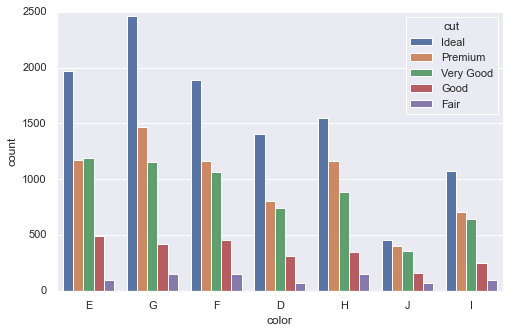

In [74]:
plt.figure(figsize=(8,5))
sns.countplot(x='color', hue='cut', data=df_1)

#### Insights

* G color cubic zirconia  have maximum ideal cut quality.

* J color cubic zirconia have minimum ideal cut quality.

* G color cubic zirconia have maximum premium cut quality.

* J color cubic zirconia have minimum premium cut quality.

* E color cubic zirconia have maximum very good cut quality.

* J color cubic zirconia have minimum very good cut quality.

* E color cubic zirconia have maximum good cut quality.

* J color cubic zirconia have minimum good cut quality.

* H color cubic zirconia have maximum fair cut quality.

* J color cubic zirconia have minimum fair cut quality.

#### * Heatmap

A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types.Correlation heatmaps are ideal for comparing the measurement for each pair of dimension values.Darker Shades have higher Corealtion , while lighter shades have smaller values of correaltion as compared to darker shades values.Correlation values near to 1 or -1 are highly positively correlated and highly negatively correlated respectively. Correlation values near to 0 are not correlated to each other.

#### Checking for Correlations

In [75]:
df_1.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035240,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.035240,1.000000,-0.297768,-0.018401,-0.024453,0.101973,-0.002895
table,0.181539,-0.297768,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018401,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024453,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.101973,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002895,0.126844,0.886554,0.856441,0.850682,1.000000


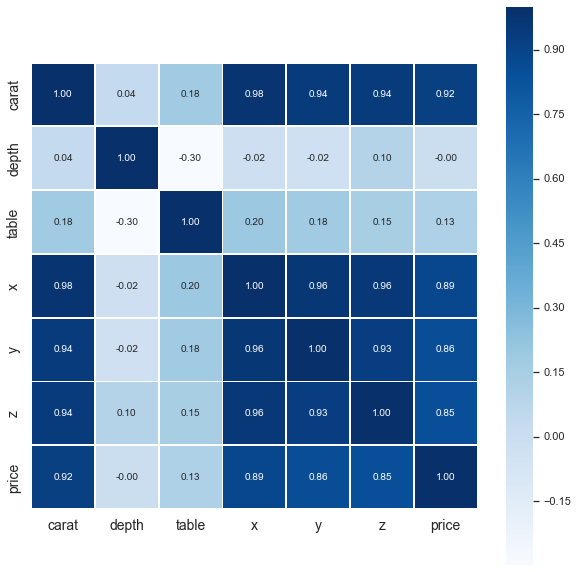

In [76]:
corr=df_1.corr()
plt.figure(figsize=(10,10)) 
sns.heatmap(corr,annot=True,cmap="Blues",linewidth=0.85,square=True,annot_kws={"size":10.10},fmt='.2f')
plt.xticks(fontsize=14)
plt.yticks(size=14)
plt.show()

#### Insights

From the above correlation table we conclude that,


* carat with x(lenght), y(width), z(height) have strong correlation i.e. 0.98 ,0.94 ,0.95.

* carat with price also have strong correlation i.e. 0.92.

* x(lenght), y(width), z(height) with price have strong correlation i.e. 0.89 ,0.86 ,0.86.

* carat with table have poor correalation i.e. 0.18.

* table with x(lenght), y(width), z(height) have poor correaltion. i.e. 0.20, 0.18, 0.15.

* carat with depth have very poor correalation i.e. 0.04.

* table with price have poor correalation i.e. 0.13.

* table with depth shows negetive correlation. i.e. -0.30.

#### *Pairplot

Pairplot shows the relationship between the variables in the form of scatterplot and the distribution of the variable in the form of histogram.

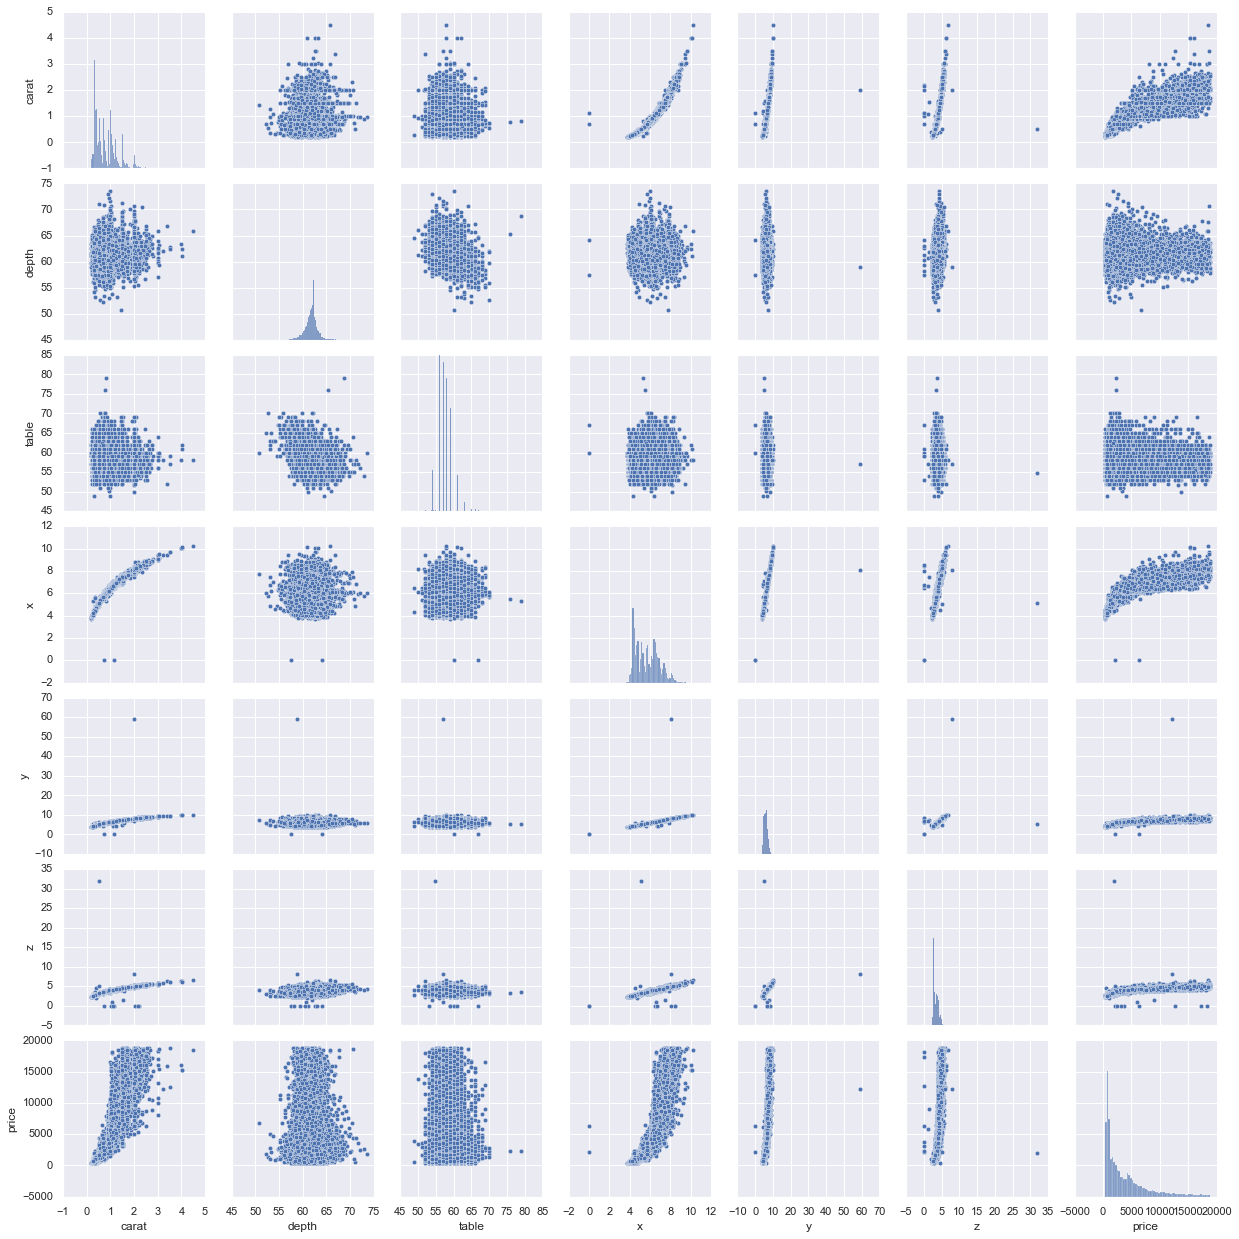

In [77]:
sns.pairplot(df_1)
plt.show()

#### Insights

* carat with x(lenght), y(width), z(height) show positive relationship , carat increases the x(lenght), y(width), z(height) is also increasing.

* carat with price show positive relationship , carat increases the price is also increasing.

* price with x(lenght) show  positive relationship ,price increases the x(lenght),is also increasing.

* price with  y(width), z(height) show some positive relationship.


#### Checking for Outliers in the dataset.

* An observation is considered to be an outlier if that particular has been mistakenly captured in the data set.

* To check for outliers, we will be plotting the box plots.

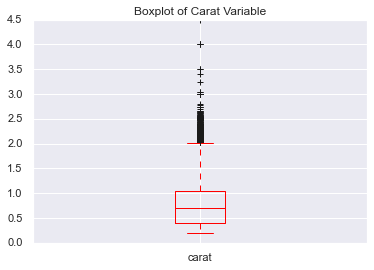

In [78]:
df_1.boxplot(column=['carat'],color="red")
plt.title("Boxplot of Carat Variable")
plt.show()

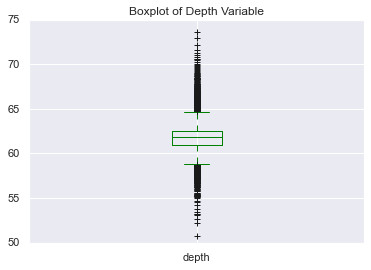

In [79]:
df_1.boxplot(column=['depth'],color="green")
plt.title("Boxplot of Depth Variable")
plt.show()

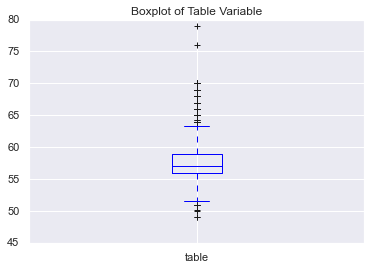

In [80]:
df_1.boxplot(column=['table'],color="blue")
plt.title("Boxplot of Table Variable")
plt.show()

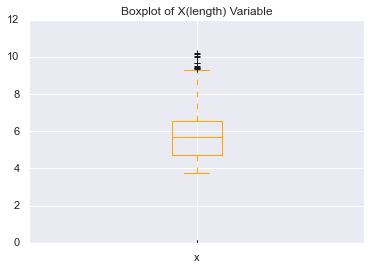

In [81]:
df_1.boxplot(column=['x'],color="orange")
plt.title("Boxplot of X(length) Variable")
plt.show()

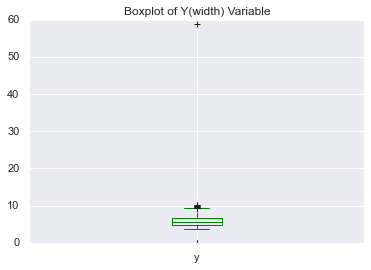

In [82]:
df_1.boxplot(column=['y'],color="green")
plt.title("Boxplot of Y(width) Variable")
plt.show()

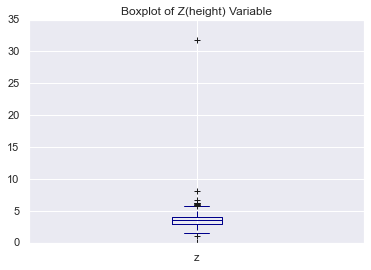

In [83]:
df_1.boxplot(column=['z'],color="darkblue")
plt.title("Boxplot of Z(height) Variable")
plt.show()

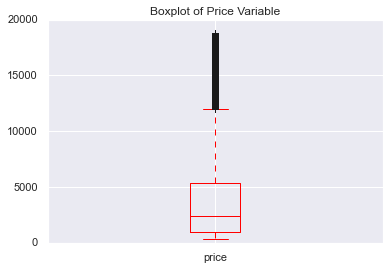

In [84]:
df_1.boxplot(column=['price'],color="red")
plt.title("Boxplot of Price Variable")
plt.show()

#### Insights

* Looking at the box plot, it seems that their are 6 independent variables Carat, Depth , Table and X(length) , Y(width) , Z(height) and 1 dependent variable Price have outliers present in the variables.

#### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

#### Checking for Null Values.

In [85]:
df_1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

#### Insights 

* From the above function we infer that only depth variable have null values i.e. 697.As we know that Theoretically, 25 to 30% is the maximum missing values are allowed, beyond which we might want to drop the variable from analysis.Here we have 2.58%(approx) null values in the the depth variable we are going to impute the null values by median by using numpy .replace func( ). 




#### Imputation of Null Values by .replace() function with median.


*  Imputation is the process of replacing missing data with substituted values like mean / median , if outliers are present  then we impute with median ,if outliers are not present then we impute with the mean.Because missing data can create problems for analyzing data, imputation is seen as a way to avoid pitfalls involved with listwise deletion of cases that have missing values.For imputation we are going to use the numpy .replace func( ).


* replace() function, each element in arr, return a copy of the string with all occurrences of substring old replaced by new.

* We can see that we have various missing values in depth column. There are various ways of treating your missing values in the data set. And which technique to use when is actually dependent on the type of data you are dealing with.

* In this exercise, we will use .replace( ) function for  the numerical columns and replace the null values with the median value.

In [86]:
median1=df_1["depth"].median()

In [87]:
df_1["depth"].replace(np.nan,median1,inplace=True)

In [88]:
df_1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

#### Insights

* We successfully impute the null values with median value  by using the .replace() function , now we donot have any null values present in the given cubic zirconia dataset.

#### Check for the values which are equal to zero.

In [89]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26933.0,61.746701,1.393875,50.8,61.10,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


There is bad values found in the x(lenght) , y(width) , z(height) columns of the Dataset. As x(lenght) , y(width) , z(height) are the length , width & height of the cubic zirconia in mm and we have found mininum value of x(lenght) , y(width) , z(height) is zero which doesnot make sense. As we know that length , width , height can't be zero. Thus, we need to treat & clean them.

#### Treatment of Bad Values or Zeros present in  x(lenght) , y(width) , z(height) columns of the Dataset.

#### 1.Treatment of bad values present in x (length of the cubic zirconia in mm).

* As we found that x min value found to be inappropirate , so we need cleaned that.We know that min value for length of of the cubic zirconia in mm can't be 0. But in x (length of the cubic zirconia in mm.) we found min value of 0 (zero) this has to be cleaned.

In [90]:
df_1[df_1['x']==0] 

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


* From above records we observe that '0' in x has been enterd maybe because the data was not available or by mistake of data entry operator. However, this data has to be imputed. We can either impute it with mean/median value or make some assumption.Here we are impute this with median.

In [91]:
df_1["x"]=np.where(df_1["x"]==0,df_1["x"].median(),df_1["x"])

In [92]:
df_1[df_1['x']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


#### Results

* We have successfully impute the bad value present in x with median value.


#### 2.Treatment of bad values present in y (width of the cubic zirconia in mm).

As we found that y min value found to be inappropirate , so we need cleaned that.We know that min value for width of of the cubic zirconia in mm can't be 0. But in y (width of the cubic zirconia in mm.) we found min value of 0 (zero) this has to be cleaned.

In [93]:
df_1[df_1['y']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,5.69,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,5.69,0.0,0.0,6381


From above records we observe that '0' in y has been enterd maybe because the data was not available or by mistake of data entry operator. However, this data has to be imputed. We can either impute it with mean/median value or make some assumption.Here we are impute this with median.

In [94]:
df_1["y"]=np.where(df_1["y"]==0,df_1["y"].median(),df_1["y"])

In [95]:
df_1[df_1['y']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


#### Results


We have successfully impute the bad value present in y with median value.

#### 3.Treatment of bad values present in z (height of the cubic zirconia in mm).

As we found that z min value found to be inappropirate , so we need cleaned that.We know that min value for height of of the cubic zirconia in mm can't be 0. But in z (width of the cubic zirconia in mm.) we found min value of 0 (zero) this has to be cleaned.

In [96]:
df_1[df_1['z']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,5.69,5.70,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,5.69,5.70,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


From above records we observe that '0' in z has been enterd maybe because the data was not available or by mistake of data entry operator. However, this data has to be imputed. We can either impute it with mean/median value or make some assumption.Here we are impute this with median.

In [97]:
df_1["z"]=np.where(df_1["z"]==0,df_1["z"].median(),df_1["z"])

In [98]:
df_1[df_1['z']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


#### Results


We have successfully impute the bad value present in z with median value.



In [99]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.20,0.40,0.70,1.05,4.50
depth,26933.0,61.746701,1.393875,50.80,61.10,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.00,56.00,57.00,59.00,79.00
x,26933.0,5.729769,1.126285,3.73,4.71,5.69,6.55,10.23
y,26933.0,5.733525,1.163989,3.71,4.72,5.70,6.54,58.90
z,26933.0,3.538815,0.717377,1.07,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.00,945.00,2375.00,5356.00,18818.00


#### Conclusion:

* We successfully impute the bad values or zero present in the x(lenght) , y(width) , z(height) columns of the Dataset. Now we clearly infer that min value of x(lenght) , y(width) , z(height) is not zero anymore & we have appropirate min values for x(lenght) , y(width) , z(height) columns of the Dataset.


* x(lenght) -

  min value is 3.73
  
  25% value is 4.71
  
  50% value is 5.69
  
  75% value is 6.55
  
  max value is 10.23
  
  
* y(width) -

  min value is 3.71
  
  25% value is 4.72
  
  50% value is 5.71
  
  75% value is 6.54
  
  max value is 58.90
  
  
 
* z(height) -

  min value is 1.07
  
  25% value is 2.90
  
  50% value is 3.52
  
  75% value is 4.04
  
  max value is 31.80
  
  

#### Geting unique counts of all Objects

In [101]:
for feature in df_1.columns: 
    if df_1[feature].dtype == 'object': 
        print(feature)
        print(df_1[feature].value_counts())
        print('\n')

cut
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64


color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64




#### Combining the sub levels of a ordinal variables 

* We combine the sub levels of a ordinal variables in order to reduce the lebels before encoding because if we do the one hot encoding then more new dummy cols of the label will be created or it can increase the dimensions of the dataset to keep ourself safe from the curse of dimensionality. We usually combine the sub levels of a ordinal variables.


* We combine the sub levels of a ordinal variables in order to reduce the lebels before encoding because if we do the label encoding  we know more number of labels is not advised for the model building or for the model performance. That's why we combine the sub levels of a ordinal variables.



#### Cut

Cut - Quality is increasing order Fair, Good, Very Good, Premium, Ideal. We are going to club Good and Very Good labels.

In [100]:
df_1['cut']=np.where(df_1['cut'] =='Good', 'Very Good', df_1['cut'])



In [101]:
df_1["cut"].value_counts()

Ideal        10805
Very Good     8462
Premium       6886
Fair           780
Name: cut, dtype: int64

#### Insights

After groupping we have 4 labels in the 'cut' labelled as - Quality is increasing order Fair, Very Good, Premium, Ideal.

#### Color 

Color - Colour of the cubic zirconia.With D being the worst and J the best. Here we labelled the colour in order to understand better & will encode with label encoding for model building.

In [102]:
df_1['color']=np.where(df_1['color'] =='D', 'Worst', df_1['color'])
df_1['color']=np.where(df_1['color'] =='E', 'Very Bad', df_1['color'])
df_1['color']=np.where(df_1['color'] =='F', 'Bad', df_1['color'])
df_1['color']=np.where(df_1['color'] =='G', 'Fair', df_1['color'])
df_1['color']=np.where(df_1['color'] =='H', 'Good', df_1['color'])
df_1['color']=np.where(df_1['color'] =='I', 'Very Good', df_1['color'])
df_1['color']=np.where(df_1['color'] =='J', 'Best', df_1['color'])



In [103]:
df_1["color"].value_counts(ascending=True)

Best         1440
Very Good    2765
Worst        3341
Good         4095
Bad          4723
Very Bad     4916
Fair         5653
Name: color, dtype: int64

#### Combining the sub levels of a ordinal variables

Here we are going to club the Fair and Good to reduce the labels.

In [104]:
df_1['color']=np.where(df_1['color'] =='Fair', 'Good', df_1['color'])


In [105]:
df_1["color"].value_counts(ascending=True)

Best         1440
Very Good    2765
Worst        3341
Bad          4723
Very Bad     4916
Good         9748
Name: color, dtype: int64

#### Conclusion:

Now we have 6 labels in the in the 'color' labelled as - Quality is increasing order 
'Worst' , 'Very Bad' , 'Bad' , 'Good' , 'Very Good' , 'Best'.

#### Clarity

 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best) IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1. Here we labelled the clarity in order to understand better & will encode with label encoding for model building.

In [106]:
df_1['clarity']=np.where(df_1['clarity'] =='IF', 'Worst', df_1['clarity'])
df_1['clarity']=np.where(df_1['clarity'] =='VVS1', 'Very Bad', df_1['clarity'])
df_1['clarity']=np.where(df_1['clarity'] =='VVS2', 'Bad', df_1['clarity'])
df_1['clarity']=np.where(df_1['clarity'] =='VS1', 'Fair', df_1['clarity'])
df_1['clarity']=np.where(df_1['clarity'] =='VS2', 'Good', df_1['clarity'])
df_1['clarity']=np.where(df_1['clarity'] =='SI1', 'Better', df_1['clarity'])
df_1['clarity']=np.where(df_1['clarity'] =='SI2', 'Very Good', df_1['clarity'])
df_1['clarity']=np.where(df_1['clarity'] =='I1', 'Best', df_1['clarity'])





In [107]:
df_1["clarity"].value_counts(ascending=True)

Best          364
Worst         891
Very Bad     1839
Bad          2530
Fair         4087
Very Good    4564
Good         6093
Better       6565
Name: clarity, dtype: int64

#### Combining the sub levels of a ordinal variables

 Here we are going to club the Fair & Good  and Better & Very Good to reduce the labels.

In [108]:
df_1['clarity']=np.where(df_1['clarity'] =='Bad', 'Very Bad', df_1['clarity'])
df_1['clarity']=np.where(df_1['clarity'] =='Fair', 'Good', df_1['clarity'])
df_1['clarity']=np.where(df_1['clarity'] =='Better', 'Very Good', df_1['clarity'])

In [109]:
df_1["clarity"].value_counts(ascending=True)

Best           364
Worst          891
Very Bad      4369
Good         10180
Very Good    11129
Name: clarity, dtype: int64

#### Conclusion:

Now we have 5 labels in the in the 'clarity' labelled as - Quality is increasing order 
'Worst' , 'Very Bad' , 'Good' , 'Very Good' , 'Best'.

#### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

#### Preprocessing Steps for Linear Regression Model Building

#### Treatment of Outliers

* Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. That's why are doing the outlier treatment.

In [339]:
cont=df_1.dtypes[(df_1.dtypes!='object') & (df_1.dtypes!='int64')].index

In [340]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [341]:
for column in df_1[cont].columns:
    lr,ur=remove_outlier(df_1[column])
    df_1[column]=np.where(df_1[column]>ur,ur,df_1[column])
    df_1[column]=np.where(df_1[column]<lr,lr,df_1[column])

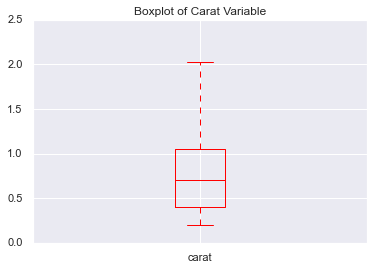

In [342]:
df_1.boxplot(column=['carat'],color="red")
plt.title("Boxplot of Carat Variable")
plt.show()

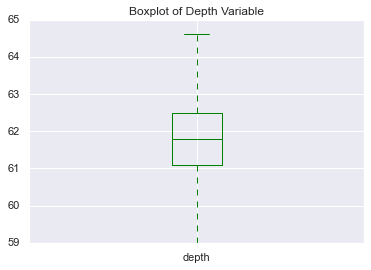

In [343]:
df_1.boxplot(column=['depth'],color="green")
plt.title("Boxplot of Depth Variable")
plt.show()

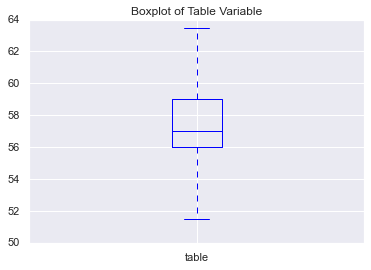

In [344]:
df_1.boxplot(column=['table'],color="blue")
plt.title("Boxplot of Table Variable")
plt.show()

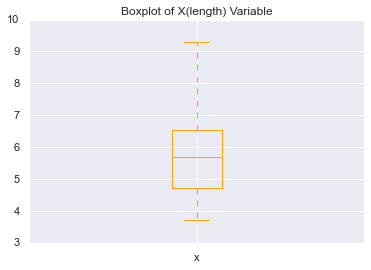

In [345]:
df_1.boxplot(column=['x'],color="orange")
plt.title("Boxplot of X(length) Variable")
plt.show()

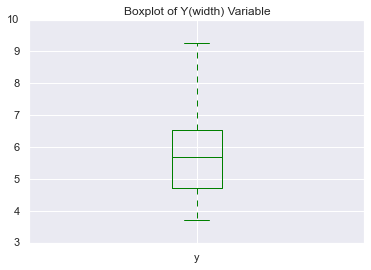

In [346]:
df_1.boxplot(column=['y'],color="green")
plt.title("Boxplot of Y(width) Variable")
plt.show()

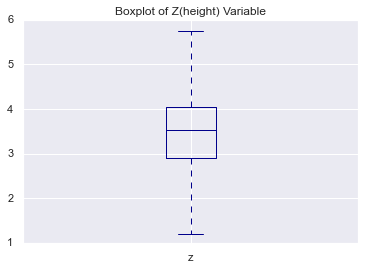

In [347]:
df_1.boxplot(column=['z'],color="darkblue")
plt.title("Boxplot of Z(height) Variable")
plt.show()

#### Insights

* We have successfully treat the outliers , now we donot have any outliers present in the independent variables of the cubic zirconia dataset.


* Here we didn't treat the outliers of the dependent variable { Price } because if we did the treatment of the dependent variable then our model predictions might be affected will not able to get right predictions. That's why we only treat the outliers of independent variables.

#### Encoding for Linear Regression Model

In [349]:
df_1.select_dtypes(include='object').head(10)

,cut,color,clarity
0,Ideal,Very Bad,Very Good
1,Premium,Good,Worst
2,Very Good,Very Bad,Very Bad
3,Ideal,Bad,Good
4,Ideal,Bad,Very Bad
5,Ideal,Worst,Good
6,Very Good,Good,Very Good
7,Premium,Very Bad,Very Good
8,Very Good,Good,Very Good
9,Ideal,Bad,Good


#### Insights

* There are three types of categorical data.


* Ordinal: Order based like :

* In Cut we have order of Quality is increasing order Fair, Very Good, Premium, Ideal.

* In Color we have order of Quality is increasing order Quality is increasing order 'Worst' , 'Very Bad' , 'Bad' , 'Good' , 'Very Good' , 'Best'.

* In Clarity we have order of Quality is increasing order Quality is increasing order 'Worst' , 'Very Bad' , 'Good' , 'Very Good' , 'Best'.

* Here, for now let us convert these into Codes by using labelling encoding to avoid high dimensionality because of OHE(get_dummies).



#### Geting unique counts of all Objects

In [350]:
for feature in df_1.columns: 
    if df_1[feature].dtype == 'object': 
        print(feature)
        print(df_1[feature].value_counts())
        print('\n')

cut
Ideal        10805
Very Good     8462
Premium       6886
Fair           780
Name: cut, dtype: int64


color
Good         9748
Very Bad     4916
Bad          4723
Worst        3341
Very Good    2765
Best         1440
Name: color, dtype: int64


clarity
Very Good    11129
Good         10180
Very Bad      4369
Worst          891
Best           364
Name: clarity, dtype: int64




#### Insights

* There are three types of categorical data.


* Ordinal: Order based like :

* In Cut we have order of Quality is increasing order Fair, Very Good, Premium, Ideal.

* In Color we have order of Quality is increasing order Quality is increasing order 'Worst' , 'Very Bad' , 'Bad' , 'Good' , 'Very Good' , 'Best'.

* In Clarity we have order of Quality is increasing order Quality is increasing order 'Worst' , 'Very Bad' , 'Good' , 'Very Good' , 'Best'.

* Here, for now let us convert these into Codes by using labelling encoding to avoid high dimensionality because of OHE(get_dummies).




#### Label Enconding

#### * Label Encoding of Cut

In [110]:
df_1['cut']=np.where(df_1['cut'] =='Fair', '0', df_1['cut'])
df_1['cut']=np.where(df_1['cut'] =='Very Good', '1', df_1['cut'])
df_1['cut']=np.where(df_1['cut'] =='Premium', '2', df_1['cut'])
df_1['cut']=np.where(df_1['cut'] =='Ideal', '3', df_1['cut'])

In [111]:
df_1["cut"].value_counts(ascending=True)

0      780
2     6886
1     8462
3    10805
Name: cut, dtype: int64

#### * Label Encoding of Color

In [112]:
df_1['color']=np.where(df_1['color'] =='Worst', '0', df_1['color'])
df_1['color']=np.where(df_1['color'] =='Very Bad', '1', df_1['color'])
df_1['color']=np.where(df_1['color'] =='Bad', '2', df_1['color'])
df_1['color']=np.where(df_1['color'] =='Good', '3', df_1['color'])
df_1['color']=np.where(df_1['color'] =='Very Good', '4', df_1['color'])
df_1['color']=np.where(df_1['color'] =='Best', '5', df_1['color'])





In [113]:
df_1["color"].value_counts(ascending=True)

5    1440
4    2765
0    3341
2    4723
1    4916
3    9748
Name: color, dtype: int64

#### * Label Encoding of Clarity

In [114]:
df_1['clarity']=np.where(df_1['clarity'] =='Worst', '0', df_1['clarity'])
df_1['clarity']=np.where(df_1['clarity'] =='Very Bad', '1', df_1['clarity'])
df_1['clarity']=np.where(df_1['clarity'] =='Good', '2', df_1['clarity'])
df_1['clarity']=np.where(df_1['clarity'] =='Very Good', '3', df_1['clarity'])
df_1['clarity']=np.where(df_1['clarity'] =='Best', '4', df_1['clarity'])




In [115]:
df_1["clarity"].value_counts(ascending=True)

4      364
0      891
1     4369
2    10180
3    11129
Name: clarity, dtype: int64

#### Checking the Dataset after Encoding

In [116]:
df_1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,3,1,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,2,3,0,60.8,58.0,4.42,4.46,2.70,984
2,0.90,1,1,1,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,3,2,2,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,3,2,1,60.4,59.0,4.35,4.43,2.65,779


In [117]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


#### Converting the Datatypes of encoded variables into int64

In [118]:
df_1['cut'] = df_1['cut'].astype('int64')
df_1['color'] = df_1['color'].astype('int64')
df_1['clarity'] = df_1['clarity'].astype('int64')

In [119]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int64  
 2   color    26933 non-null  int64  
 3   clarity  26933 non-null  int64  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 3.3 MB


In [120]:
df_1.to_csv('cubic_zirconia_updated_1') #cubic_zirconia_update_1 this dataset contain encoded data which we use for Multiple Model Building.

#### Linear Regression Model : 1 ( with outlier treatment )

#### Train-Test Split for Linear Regression Model

In [363]:
X = df_1.drop('price',axis=1)
Y = df_1[['price']]

#### Split X and Y into training and test set in 70:30 ratio.

In [364]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

#### Invoke the LinearRegression function.

In [366]:
regression_model= LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

#### Explore the coefficients for each of the independent attributes.

In [367]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}" . format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 13571.683740760513
The coefficient for cut is 135.98605320137753
The coefficient for color is -376.55070332051673
The coefficient for clarity is -892.462765659155
The coefficient for depth is -17.13901605079258
The coefficient for table is -35.40418175538726
The coefficient for x is -2459.0892736346445
The coefficient for y is 1601.7602050587698
The coefficient for z is -1721.6619421768203


#### Intercept for the model


In [368]:
regression_model.intercept_

array([9829.25572257])

#### R square on training data

In [369]:
regression_model.score(X_train,Y_train)

0.9107855334149219

#### R square on testing data

In [370]:
regression_model.score(X_test,Y_test)

0.9136525749360112

In [371]:
from numpy import math
from sklearn import metrics

#### RMSE on Training data

In [372]:
#RMSE on Training data
predicted_train= regression_model.fit(X_train,Y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(Y_train,predicted_train))

1197.576490998623

#### RMSE on Testing data

In [373]:
predicted_test= regression_model.fit(X_train,Y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test,predicted_test))

1190.87764451318

#### Linear Regression using statsmodels 1

In [374]:
# concatenate X and y into a single dataframe
data_train= pd.concat([X_train,Y_train],axis=1)
data_test= pd.concat([X_test,Y_test],axis=1)
data_train.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,1,3,2,62.4,60.0,4.41,4.44,2.76,537
2275,0.30,3,1,2,61.2,55.0,4.35,4.31,2.65,844
19183,0.50,3,3,3,62.5,57.0,5.09,5.05,3.17,1240
5030,1.10,1,1,3,63.3,56.0,6.53,6.58,4.15,4065
25414,1.02,2,2,3,61.1,62.0,6.54,6.49,3.98,4057


In [375]:
data_test.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
16997,1.26,2,4,3,60.5,62.0,6.97,6.92,4.20,5292
24457,0.90,1,3,2,59.0,59.0,6.35,6.36,3.72,4484
16612,1.37,3,2,2,59.6,57.0,7.28,7.22,4.32,11649
308,0.84,1,3,2,63.6,57.0,5.98,5.93,3.79,3316
26652,2.00,1,5,2,60.8,62.0,8.09,8.12,4.93,13043


In [376]:
Y_test.head()

,price
16997,5292
24457,4484
16612,11649
308,3316
26652,13043


In [377]:
expr= 'price ~ carat + cut + color +clarity + depth + table + x + y + z'

In [378]:
import statsmodels.formula.api as smf
lm1= smf.ols(formula=expr, data=data_train).fit()
lm1.params

Intercept     9829.255723
carat        13571.683741
cut            135.986053
color         -376.550703
clarity       -892.462766
depth          -17.139016
table          -35.404182
x            -2459.089274
y             1601.760205
z            -1721.661942
dtype: float64

In [379]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 2.137e+04
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:34:33   Log-Likelihood:            -1.6038e+05
No. Observations:               18853   AIC:                         3.208e+05
Df Residuals:                   18843   BIC:                         3.209e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9829.2557   1031.528      9.529      0.0

#### Hypothesis Testing 

H0 : There is no relationship between independent and the dependen variable.

H1 : There is a relationship between independent and the dependen variable.   

As we found that in statsmodel summary the pvalue of depth variable is 0.192. We know that if pvalue < 0.5 reject the null hypohesis & if pvalue > 0.5 we fail to reject the null hypothesis.Here we found that pvalue of depth is 0.195 which greater than 0.5. So, we fail to reject the null hypothesis.Depth is not good varibale to predict the  price of the cubic zirconia so we drop it from the ols model and rebulit the model again and check the statsmodel summary and rmse and accuracy of the model again.

#### Calculate MSE

In [380]:
mse= np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
mse

1434189.4517925722

#### Root Mean Squared Error - RMSE

In [381]:
np.sqrt(mse)

1197.576490998622

#### Prediction on Test data

In [382]:
y_pred = lm1.predict(data_test)

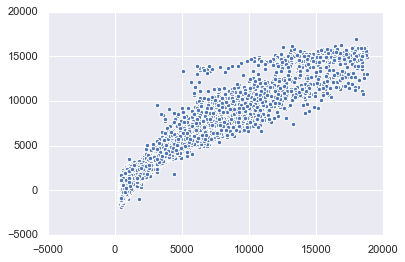

In [383]:
plt.scatter(Y_test['price'],y_pred)
plt.show()

In [384]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(9829.26) * Intercept + (13571.68) * carat + (135.99) * cut + (-376.55) * color + (-892.46) * clarity + (-17.14) * depth + (-35.4) * table + (-2459.09) * x + (1601.76) * y + (-1721.66) * z + 

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [386]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [387]:
i=0
for column in X.columns:
    if i < 9:
        print (column ,"--->",  vif[i])
        i = i+1



carat ---> 121.0393389522025
cut ---> 7.825817600127252
color ---> 4.270949713420288
clarity ---> 9.503246843639163
depth ---> 1155.5475921943837
table ---> 871.3738716144344
x ---> 10646.829638778272
y ---> 9357.38254505309
z ---> 2998.8096429554753


#### Insights 

VIF value must be in between 1 to 5 , but we saw here all the VIF are very high which that their is a strong multicollinearity between the variables.

#### Linear Rregression Model : 2 ( without outlier treatment )

In [121]:
df_model_2 = pd.read_csv("cubic_zirconia_updated_1")

In [122]:
df_model_2.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,3,1,3,62.1,58.0,4.27,4.29,2.66,499
1,1,0.33,2,3,0,60.8,58.0,4.42,4.46,2.70,984
2,2,0.90,1,1,1,62.2,60.0,6.04,6.12,3.78,6289
3,3,0.42,3,2,2,61.6,56.0,4.82,4.80,2.96,1082
4,4,0.31,3,2,1,60.4,59.0,4.35,4.43,2.65,779


In [124]:
df_model_2.drop(["Unnamed: 0"],axis=1,inplace=True)

In [126]:
df_model_2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,3,1,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,2,3,0,60.8,58.0,4.42,4.46,2.70,984
2,0.90,1,1,1,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,3,2,2,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,3,2,1,60.4,59.0,4.35,4.43,2.65,779


#### Train-Test Split for Linear Regression Model 2

In [127]:
X1 = df_model_2.drop('price',axis=1)
Y1 = df_model_2[['price']]

#### Split X and Y into training and test set in 70:30 ratio.

In [128]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X1, Y1, test_size=0.30 , random_state=1)

#### Invoke the LinearRegression function.

In [129]:
regression_model= LinearRegression()
regression_model.fit(X_train_1, Y_train_1)

LinearRegression()

#### Explore the coefficients for each of the independent attributes.

In [130]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train_1.columns):
    print("The coefficient for {} is {}" . format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 10995.374364620247
The coefficient for cut is 103.42154931763986
The coefficient for color is -376.89482791221263
The coefficient for clarity is -931.9613456294825
The coefficient for depth is -94.13589656418183
The coefficient for table is -38.02170910227073
The coefficient for x is -982.7154555711769
The coefficient for y is 3.8425597551378203
The coefficient for z is -31.718499390264405


#### Intercept for the model

In [131]:
regression_model.intercept_

array([11601.82863906])

#### R square on training data

In [132]:
regression_model.score(X_train_1,Y_train_1)

0.9028908224702554

#### R square on testing data

In [133]:
regression_model.score(X_test_1,Y_test_1)

0.9027027269979324

In [134]:
from numpy import math
from sklearn import metrics

#### RMSE on Training data

In [135]:
#RMSE on Training data
predicted_train_1= regression_model.fit(X_train_1,Y_train_1).predict(X_train_1)
np.sqrt(metrics.mean_squared_error(Y_train_1,predicted_train_1))

1249.4410151857392

#### RMSE on Testing data

In [136]:
predicted_test_1= regression_model.fit(X_train_1,Y_train_1).predict(X_test_1)
np.sqrt(metrics.mean_squared_error(Y_test_1,predicted_test_1))

1264.1330364514727

#### Linear Regression Model 2 using statsmodels 

In [137]:
# concatenate X and y into a single dataframe
data_train_1= pd.concat([X_train_1,Y_train_1],axis=1)
data_test_1= pd.concat([X_test_1,Y_test_1],axis=1)
data_train_1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22092,0.34,1,3,2,62.4,60.0,4.41,4.44,2.76,537
2275,0.30,3,1,2,61.2,55.0,4.35,4.31,2.65,844
19165,0.50,3,3,3,62.5,57.0,5.09,5.05,3.17,1240
5029,1.10,1,1,3,63.3,56.0,6.53,6.58,4.15,4065
25384,1.02,2,2,3,61.1,62.0,6.54,6.49,3.98,4057


In [138]:
expr_1 = 'price ~ carat + cut + color +clarity + depth + table + x + y + z'

In [139]:
import statsmodels.formula.api as smf
lm2= smf.ols(formula=expr_1, data=data_train_1).fit()
lm2.params

Intercept    11601.828639
carat        10995.374365
cut            103.421549
color         -376.894828
clarity       -931.961346
depth          -94.135897
table          -38.021709
x             -982.715456
y                3.842560
z              -31.718499
dtype: float64

In [141]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 1.947e+04
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        01:44:27   Log-Likelihood:            -1.6118e+05
No. Observations:               18853   AIC:                         3.224e+05
Df Residuals:                   18843   BIC:                         3.225e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.16e+04    716.803     16.186      0.0

#### Calculate MSE

In [143]:
mse_1= np.mean((lm2.predict(data_train_1.drop('price',axis=1))-data_train_1['price'])**2)
mse_1

1561102.8504283598

#### Root Mean Squared Error - RMSE

In [144]:
np.sqrt(mse_1)

1249.4410151857348

#### Prediction on Test data

In [145]:
y_pred_1 = lm2.predict(data_test_1)

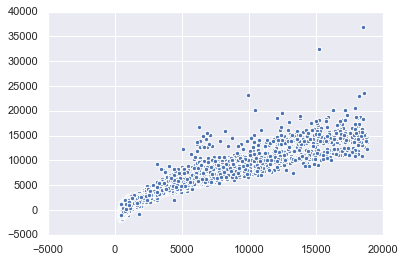

In [146]:
plt.scatter(Y_test_1['price'],y_pred_1)
plt.show()

In [147]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(11601.83) * Intercept + (10995.37) * carat + (103.42) * cut + (-376.89) * color + (-931.96) * clarity + (-94.14) * depth + (-38.02) * table + (-982.72) * x + (3.84) * y + (-31.72) * z + 

In [150]:
vif = [variance_inflation_factor(X1.values, ix) for ix in range(X1.shape[1])] 

In [151]:
i=0
for column in X1.columns:
    if i < 9:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 81.5033418559768
cut ---> 6.860729682922422
color ---> 4.27389351773964
clarity ---> 9.369000024698023
depth ---> 558.577146731718
table ---> 556.1039170515155
x ---> 1133.1266837484013
y ---> 347.88572635041317
z ---> 382.0311260961392


#### Linear Rregression Model : 3 ( Z-Score )

In [2]:
df_model_3=pd.read_csv("cubic_zirconia_updated_1")

In [3]:
df_model_3.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,3,1,3,62.1,58.0,4.27,4.29,2.66,499
1,1,0.33,2,3,0,60.8,58.0,4.42,4.46,2.70,984
2,2,0.90,1,1,1,62.2,60.0,6.04,6.12,3.78,6289
3,3,0.42,3,2,2,61.6,56.0,4.82,4.80,2.96,1082
4,4,0.31,3,2,1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df_model_3.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:
df_model_3.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,3,1,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,2,3,0,60.8,58.0,4.42,4.46,2.70,984
2,0.90,1,1,1,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,3,2,2,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,3,2,1,60.4,59.0,4.35,4.43,2.65,779


#### Train-Test Split for Linear Regression Model 

In [6]:
X3 = df_model_3.drop('price',axis=1)
Y3 = df_model_3[['price']]

#### Split X and Y into training and test set in 70:30 ratio.

In [7]:
from sklearn.model_selection import train_test_split
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X3, Y3, test_size=0.30 , random_state=1)

In [8]:
from scipy.stats import zscore

X_train_scaled  = X_train_3.apply(zscore)
X_test_scaled = X_test_3.apply(zscore)
y_train_scaled = Y_train_3.apply(zscore)
y_test_scaled = Y_test_3.apply(zscore)



In [32]:
X_train_scaled.head()

,carat,cut,color,clarity,depth,table,x,y,z
22092,-0.962965,-1.135718,0.518207,-0.248847,0.474258,1.142579,-1.175896,-1.097235,-1.076308
2275,-1.047213,1.067131,-0.956028,-0.248847,-0.393958,-1.097500,-1.229359,-1.207451,-1.228247
19165,-0.625974,1.067131,0.518207,0.932896,0.546609,-0.201468,-0.569979,-0.580066,-0.509989
5029,0.637744,-1.135718,-0.956028,0.932896,1.125420,-0.649484,0.713140,0.717097,0.843651
25384,0.469249,-0.034294,-0.218911,0.932896,-0.466310,2.038611,0.722050,0.640793,0.608836


#### Invoke the LinearRegression function.

In [9]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

#### Explore the coefficients for each of the independent attributes.

In [10]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train_3.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.3020432866410232
The coefficient for cut is 0.023419132324343093
The coefficient for color is -0.12752572043584115
The coefficient for clarity is -0.1966930919244331
The coefficient for depth is -0.03245062536483056
The coefficient for table is -0.02116667988395818
The coefficient for x is -0.2750666364781017
The coefficient for y is 0.001130399870640189
The coefficient for z is -0.005727300197063211


#### Intercept for the model

In [11]:
intercept = regression_model.intercept_[0]
intercept

-8.306971752742142e-17

#### R square on training data

In [12]:
regression_model.score(X_train_scaled,y_train_scaled)

0.9028908224702554

#### R square on test data

In [13]:
regression_model.score(X_test_scaled,y_test_scaled)

0.9026286235959851

In [14]:
from numpy import math
from sklearn import metrics

#### RMSE on Training data

In [15]:
#RMSE on Training data
predicted_train_3= regression_model.fit(X_train_3,Y_train_3).predict(X_train_3)
np.sqrt(metrics.mean_squared_error(Y_train_3,predicted_train_3))

1249.4410151857392

#### RMSE on Test data

In [16]:
predicted_test_3= regression_model.fit(X_test_3,Y_test_3).predict(X_test_3)
np.sqrt(metrics.mean_squared_error(Y_test_3,predicted_test_3))

1256.332600024064

#### Linear Regression Model 3 using statsmodels

In [41]:
data_train_3= pd.concat([X_train_3.apply(zscore),Y_train_3.apply(zscore)],axis=1)
data_test_3= pd.concat([X_test_3.apply(zscore),Y_test_3.apply(zscore)],axis=1)
data_train_3.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
22092,-0.962965,-1.135718,0.518207,-0.248847,0.474258,1.142579,-1.175896,-1.097235,-1.076308,-0.847249
2275,-1.047213,1.067131,-0.956028,-0.248847,-0.393958,-1.097500,-1.229359,-1.207451,-1.228247,-0.770680
19165,-0.625974,1.067131,0.518207,0.932896,0.546609,-0.201468,-0.569979,-0.580066,-0.509989,-0.671913
5029,0.637744,-1.135718,-0.956028,0.932896,1.125420,-0.649484,0.713140,0.717097,0.843651,0.032671
25384,0.469249,-0.034294,-0.218911,0.932896,-0.466310,2.038611,0.722050,0.640793,0.608836,0.030676
10227,-0.120487,-1.135718,0.518207,0.932896,0.763663,0.694563,-0.008614,0.030364,0.097768,-0.432978
4712,-0.078363,-1.135718,0.518207,0.932896,-2.926255,2.486626,0.285434,0.199927,-0.095609,-0.370875
2548,0.448187,-0.034294,0.518207,-0.248847,0.763663,0.694563,0.570571,0.513620,0.622649,0.669415
14757,-0.857656,1.067131,0.518207,0.932896,-0.249256,-1.097500,-0.917490,-0.842889,-0.882931,-0.751974
491,-0.836594,-1.135718,-0.956028,0.932896,0.763663,0.694563,-0.944221,-0.876802,-0.827680,-0.804849


In [42]:
expr_3 = 'price ~ carat + cut + color + clarity + depth + table + x + y + z'

In [43]:
import statsmodels.formula.api as smf
lm3= smf.ols(formula=expr_3, data=data_train_3).fit()
lm3.params

Intercept   -5.854692e-18
carat        1.302043e+00
cut          2.341913e-02
color       -1.275257e-01
clarity     -1.966931e-01
depth       -3.245063e-02
table       -2.116668e-02
x           -2.750666e-01
y            1.130400e-03
z           -5.727300e-03
dtype: float64

In [36]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 1.947e+04
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        03:47:53   Log-Likelihood:                -4769.4
No. Observations:               18853   AIC:                             9559.
Df Residuals:                   18843   BIC:                             9637.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.855e-18      0.002  -2.58e-15      1.0

#### Calculate MSE

In [45]:
mse_2= np.mean((lm3.predict(data_train_3.drop('price',axis=1))-data_train_3['price'])**2)
mse_2

0.0971091775297441

In [46]:
#Root Mean Squared Error - RMSE
np.sqrt(mse_2)

0.31162345471697744

In [47]:
# Prediction on Test data
y_pred_3 = lm3.predict(data_test_3)

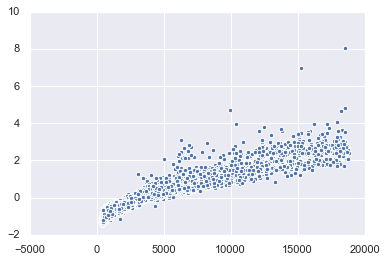

In [48]:
plt.scatter(Y_test_3['price'], y_pred_3)
plt.show()

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X3.values, ix) for ix in range(X3.shape[1])]

In [52]:
i=0
for column in X3.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1



carat ---> 81.5033418559768
cut ---> 6.860729682922422
color ---> 4.27389351773964
clarity ---> 9.369000024698023
depth ---> 558.577146731718
table ---> 556.1039170515155
x ---> 1133.1266837484013
y ---> 347.88572635041317
z ---> 382.0311260961392


#### Linear Regression Model 4 (Applied Feature Engineering)

In [53]:
df_model_4=pd.read_csv("cubic_zirconia_updated_1")

In [54]:
df_model_4.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,3,1,3,62.1,58.0,4.27,4.29,2.66,499
1,1,0.33,2,3,0,60.8,58.0,4.42,4.46,2.70,984
2,2,0.90,1,1,1,62.2,60.0,6.04,6.12,3.78,6289
3,3,0.42,3,2,2,61.6,56.0,4.82,4.80,2.96,1082
4,4,0.31,3,2,1,60.4,59.0,4.35,4.43,2.65,779


In [55]:
df_model_4.drop(["Unnamed: 0"],axis=1,inplace=True)

In [56]:
df_model_4.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,3,1,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,2,3,0,60.8,58.0,4.42,4.46,2.70,984
2,0.90,1,1,1,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,3,2,2,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,3,2,1,60.4,59.0,4.35,4.43,2.65,779


In [59]:
df_model_4.loc[:,"area"]=df_model_4.iloc[:,6:9].prod(axis=1)#make a new col named as area. [area = x.y.z]

In [60]:
df_model_4

,carat,cut,color,clarity,depth,table,x,y,z,price,area
0,0.30,3,1,3,62.1,58.0,4.27,4.29,2.66,499,48.726678
1,0.33,2,3,0,60.8,58.0,4.42,4.46,2.70,984,53.225640
2,0.90,1,1,1,62.2,60.0,6.04,6.12,3.78,6289,139.726944
3,0.42,3,2,2,61.6,56.0,4.82,4.80,2.96,1082,68.482560
4,0.31,3,2,1,60.4,59.0,4.35,4.43,2.65,779,51.066825
...,...,...,...,...,...,...,...,...,...,...,...
26928,1.11,2,3,3,62.3,58.0,6.61,6.52,4.09,5408,176.267548
26929,0.33,3,3,0,61.9,55.0,4.44,4.42,2.74,1114,53.771952
26930,0.51,2,1,2,61.7,58.0,5.12,5.15,3.17,1656,83.586560
26931,0.27,1,2,1,61.8,56.0,4.19,4.20,2.60,682,45.754800


In [61]:
df_model_4.drop(["x",'y','z'],axis=1,inplace=True)#dropping  x, y, z.

In [62]:
df_model_4.head()

,carat,cut,color,clarity,depth,table,price,area
0,0.30,3,1,3,62.1,58.0,499,48.726678
1,0.33,2,3,0,60.8,58.0,984,53.225640
2,0.90,1,1,1,62.2,60.0,6289,139.726944
3,0.42,3,2,2,61.6,56.0,1082,68.482560
4,0.31,3,2,1,60.4,59.0,779,51.066825


#### Train-Test Split for Linear Regression Model

In [63]:
X4 = df_model_4.drop('price',axis=1)
Y4 = df_model_4[['price']]

#### Split X and Y into training and test set in 70:30 ratio.

In [64]:
from sklearn.model_selection import train_test_split
X_train_4, X_test_4, Y_train_4, Y_test_4 = train_test_split(X4, Y4, test_size=0.30 , random_state=1)

#### Invoke the LinearRegression function.

In [65]:
regression_model= LinearRegression()
regression_model.fit(X_train_4, Y_train_4)

LinearRegression()

#### Explore the coefficients for each of the independent attributes.

In [66]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train_4.columns):
    print("The coefficient for {} is {}" . format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8683.924280963514
The coefficient for cut is 105.90184220433494
The coefficient for color is -372.323745419193
The coefficient for clarity is -977.1567159616646
The coefficient for depth is -51.699714493156755
The coefficient for table is -37.6839687737022
The coefficient for area is 0.13193675940098695


#### Intercept for the model



In [67]:
regression_model.intercept_

array([5151.29267584])

#### R square on training data

In [68]:
regression_model.score(X_train_4,Y_train_4)

0.8998127112974966

#### R square on testing data

In [69]:
regression_model.score(X_test_4,Y_test_4)

0.9003498265899168

In [70]:
from numpy import math
from sklearn import metrics

#### RMSE on Training data

In [71]:
#RMSE on Training data
predicted_train_4= regression_model.fit(X_train_4,Y_train_4).predict(X_train_4)
np.sqrt(metrics.mean_squared_error(Y_train_4,predicted_train_4))

1269.0885689301178

#### RMSE on Testing data

In [72]:
predicted_test_4= regression_model.fit(X_train_4,Y_train_4).predict(X_test_4)
np.sqrt(metrics.mean_squared_error(Y_test_4,predicted_test_4))

1279.3267371088534

#### Linear Regression Model 4 using statsmodels 

In [73]:
# concatenate X and y into a single dataframe
data_train_4= pd.concat([X_train_4,Y_train_4],axis=1)
data_test_4= pd.concat([X_test_4,Y_test_4],axis=1)
data_train_4.head()

,carat,cut,color,clarity,depth,table,area,price
22092,0.34,1,3,2,62.4,60.0,54.041904,537
2275,0.30,3,1,2,61.2,55.0,49.683525,844
19165,0.50,3,3,3,62.5,57.0,81.483265,1240
5029,1.10,1,1,3,63.3,56.0,178.314710,4065
25384,1.02,2,2,3,61.1,62.0,168.929508,4057


In [74]:
expr_4= 'price ~ carat + cut + color +clarity + depth + table + area'

In [76]:
import statsmodels.formula.api as smf
lm4= smf.ols(formula=expr_4, data=data_train_4).fit()
lm4.params

Intercept    5151.292676
carat        8683.924281
cut           105.901842
color        -372.323745
clarity      -977.156716
depth         -51.699714
table         -37.683969
area            0.131937
dtype: float64

In [77]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 2.418e+04
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        04:38:06   Log-Likelihood:            -1.6148e+05
No. Observations:               18853   AIC:                         3.230e+05
Df Residuals:                   18845   BIC:                         3.230e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5151.2927    661.409      7.788      0.0

#### Calculate MSE

In [79]:
mse_4= np.mean((lm4.predict(data_train_4.drop('price',axis=1))-data_train_4['price'])**2)
mse_4

1610585.7957890965

#### Root Mean Squared Error - RMSE

In [80]:
np.sqrt(mse_4)

1269.0885689301188

#### Prediction on Test data

In [81]:
y_pred_4 = lm4.predict(data_test_4)

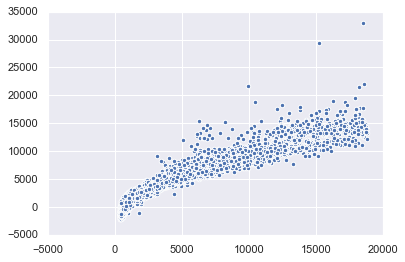

In [82]:
plt.scatter(Y_test_4['price'],y_pred_4)
plt.show()

In [83]:
for i,j in np.array(lm4.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(5151.29) * Intercept + (8683.92) * carat + (105.9) * cut + (-372.32) * color + (-977.16) * clarity + (-51.7) * depth + (-37.68) * table + (0.13) * area + 

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
vif = [variance_inflation_factor(X4.values, ix) for ix in range(X4.shape[1])] 



In [86]:
i=0
for column in X4.columns:
    if i < 9:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 50.8593205612385
cut ---> 6.38981578579258
color ---> 4.271191049858925
clarity ---> 9.187574857372661
depth ---> 454.0528564411028
table ---> 427.92455431733987
area ---> 47.34501022665412


#### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.


Insights :

* 40.11% cubic zirconia have Ideal cut quality which is the max among all 5 cut quality present in the data.
* 25.6% cubic zirconia have Premium cut quality.
* 22.4% cubic zirconia have Very Good cut quality.
* 9.0% cubic zirconia have Good cut quality.
* Only 2.9% cubic zirconia have Fair cut quality which is the min among all 5 cut quality present in the data.
* 21% cubic zirconia are of G color which is the max among all 7 color present in the data.
* 18.3% cubic zirconia are of E color.
* 17.5% cubic zirconia are of F color.
* 15.2% cubic zirconia are of H color.
* 12.4% cubic zirconia are of D color.
* 10.3% cubic zirconia are of I color.
* 5.3% cubic zirconia are of J color which is the min among all 7 color present in the data.
* 24.4% of cubic zirconia are of SI1 clarity which is the max among all 8 clarity quality present in the data.
* 22.6% of cubic zirconia are of VS2 clarity.
* 16.9% of cubic zirconia are of SI2 clarity.
* 15.2% of cubic zirconia are of VS1 clarity.
* 9.4% of cubic zirconia are of VVS2 clarity.
* 6.8% of cubic zirconia are of VVS1 clarity.
* 3.3% of cubic zirconia are of IF clarity.
* 1.4% of cubic zirconia are of I1 clarity which is the min among all 8 clarity quality present in the data.
* carat with x(lenght), y(width), z(height) have strong correlation i.e. 0.98 ,0.94 ,0.95.
* carat with price also have strong correlation i.e. 0.92.x(lenght), y(width), z(height) with price have strong correlation i.e. 0.89 ,0.86 ,0.86.
* carat with table have poor correalation i.e. 0.18.
* table with x(lenght), y(width), z(height) have poor correaltion. i.e. 0.20, 0.18, 0.15.
* carat with depth have very poor correalation i.e. 0.04.
* table with price have poor correalation i.e. 0.13.
* table with depth shows negetive correlation. i.e. -0.30.
* The coefficient for carat is 13571.683740760513
* The coefficient for cut is 135.98605320137753
* The coefficient for color is -376.55070332051673
* The coefficient for clarity is -892.462765659155
* The coefficient for depth is -17.13901605079258
* The coefficient for table is -35.40418175538726
* The coefficient for x is -2459.0892736346445
* The coefficient for y is 1601.7602050587698
* The coefficient for z is -1721.6619421768203


Comparing  the Model Scores from the Linear Regression models , LM1 sees to be an optimum model. From the Analysis, we can get a clear picture that on basis of the cut,Ideal cut had a significant number of turnover to the company.The Colours G,E, F,H are also comparatively superior over the other colours & have provided profits.We could see that the dimensional features had strong positive correlation among themselves & with the price feature. From our result,the computed R-Square is 91.07% for the model which means that 91.07% of the variance of the  target variable price is explained by the predictors (independent variables) in the training data set. Also,for better accuracies we have dropped the columns depth & depth as the had p values more than 0.05 for better results. The final Linear Regression equation is as follows:  Carat is the highest co-efficient in the predicting the price, change in 1 unit of the carat will have an impact on the price 13571 times, henceforth it is the most important deciding  factor for the price of the diamond. The Top Attributes reasonable & influencing the price are : Carat,  ,Cut , Color & Clarity.

Recommendations:

 The company should focus on key strengths & develop marketing strategies to promote  diamond’s carat , cut and clarity & also be competitive about their prices. More Carat & clear the stone the profits are more. The cuts of the diamond are also a significant factor in the prices .Company  should focus on the carat , cut ,color and clarity  for the zirconia stone in order to make more profits.



#### Problem Statement 2: Logistic Regression and LDA (Linear discriminant analysis).

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

#### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

#### * EDA - Data Description , Data Preprocessing , Data Visualization.

#### Loading the Dataset CSV file of Problem Statement 2.

In [2]:
df_2=pd.read_csv("Holiday_Package.csv")

#### Checking the Records of the Dataset.

#### * Head of the Dataset - First 10 Records of the Dataset.

In [3]:
df_2.head(10)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no
8,9,no,41140,39,12,0,0,no
9,10,no,35826,43,11,0,2,no


#### * Tail of the Dataset - Last 10 Rows of the Dataset.

In [4]:
df_2.tail(10)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
862,863,no,66900,35,10,1,1,yes
863,864,no,35290,51,9,0,1,yes
864,865,no,25527,41,5,1,0,yes
865,866,yes,44057,35,9,0,2,yes
866,867,yes,22643,42,14,0,0,yes
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


#### Dropping the Unnamed: 0 Column.

* We are going to drop the column unnamed:0 as it is useless for the model.

In [5]:
df_2.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df_2.head(10) #Head of the Dataset after dropping the " Unnamed: 0 " column.

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
5,yes,61590,42,12,0,1,no
6,no,94344,51,8,0,0,no
7,yes,35987,32,8,0,2,no
8,no,41140,39,12,0,0,no
9,no,35826,43,11,0,2,no


In [7]:
df_2.tail(10) #Tail of the Dataset after dropping the " Unnamed: 0 " column.

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
862,no,66900,35,10,1,1,yes
863,no,35290,51,9,0,1,yes
864,no,25527,41,5,1,0,yes
865,yes,44057,35,9,0,2,yes
866,yes,22643,42,14,0,0,yes
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes
871,no,74659,51,10,0,0,yes


#### Insights

* Now we have all the columns which are useful for the model.

#### Data Dictionary for Problem Statment 2.

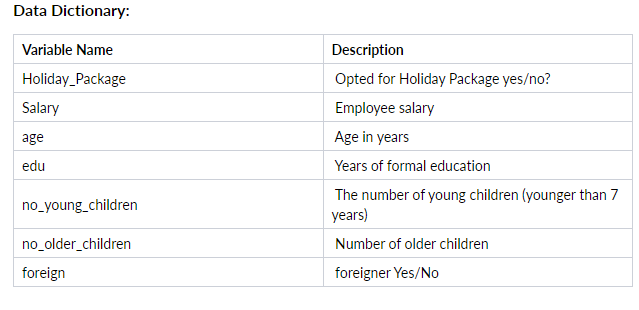

In [8]:
from IPython.display import Image
Image(filename="Data Dictionary Problem 2.png")

#### Checking the Summary of the Dataset.

In [9]:
df_2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Insights

* From the above table we can infer the count,mean, std , 25% , 50% ,75% and min & max values of the all numeric variables present in the dataset.


* From the above table we can infer the count,unique,top,freq of all the categorical variables present in the dataset.


#### Checking the Shape of the Dataframe.

In [10]:
df_2.shape

(872, 7)

#### Insights

* Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The Holiday_Package.csv data set has 872 observations (rows) and 7 variables (columns) in the dataset.

#### Checking the Appropriateness of Datatypes & Information of the Dataframe.

In [11]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


#### Insights

* From the above results we can see that there is  no null values present in the dataset.Their are total 872 rows & 7 columns in this dataset,indexed from 0 to 871. Out of 7 variables 5 are int64 , 2 variables are object. Memory used by the dataset: 47.8+ KB.

#### Checking for Null Values.

In [12]:
df_2.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

#### Insights

* From the above output we infer that only their is no null values in the dataset.

#### Checking for Anomalies in the Dataset.

In [13]:
df_2["Holliday_Package"].unique()

array(['no', 'yes'], dtype=object)

In [14]:
df_2["Salary"].unique()

array([ 48412,  37207,  58022,  66503,  66734,  61590,  94344,  35987,
        41140,  35826,  42643,  35157,  75327, 148221,  98870,  80297,
        52117, 139253,  62858,  57400,  52059,  66711,  51463,  35682,
        35741,  40183,  37821,  74927,  51077,  38804, 129262,  42920,
        41136,  37690,  68572,  30192,  31973,  99423,  70022,  34646,
        66588,  42497,  36998,  44331,  15818,  55391,  76831,  23183,
        40991,  41967,  33523,  35136,  35533,  34045,  33768,  35305,
        68770,  30299,  29901,  52268,  35089,  27554, 165895,  90324,
        36855,  36072,  45187,  83859,  49748,  30225,  65950,  35344,
        39663, 107442,  40904,  36959,  50291,  54718,  31684,  15462,
        25773,  29139,  38991,  47265,  37831,  42386,  51652,  29308,
        84031,  75798,  35302,  48398,  40133,  29166,  51060,  63102,
        42334,  30899,  44721,  31201,  61159,  40373,  42172,  32432,
        46220,  37838,  64928,  47624, 216630,  47972,  43031,  48282,
      

In [15]:
df_2["age"].unique()

array([30, 45, 46, 31, 44, 42, 51, 32, 39, 43, 60, 33, 56, 47, 50, 53, 29,
       20, 54, 28, 49, 55, 24, 36, 23, 41, 38, 37, 22, 34, 58, 59, 35, 61,
       40, 52, 21, 48, 62, 27, 57, 26, 25])

In [16]:
df_2["educ"].unique()

array([ 8,  9, 11, 12, 14, 19, 10, 13, 15,  4, 17,  7, 16,  6,  5, 21,  2,
       18,  3,  1])

In [17]:
df_2["no_young_children"].unique()

array([1, 0, 2, 3])

In [18]:
df_2["no_older_children"].unique()

array([1, 0, 2, 4, 3, 5, 6])

In [19]:
df_2["foreign"].unique()

array(['no', 'yes'], dtype=object)

#### Observations

* No Anomalies found in the Dataset.

#### Checking the Value counts on all the Categorical Column.

In [20]:
df_2["Holliday_Package"].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

#### Insights

As per the given Data Dictionary there are 2 label in Holliday_Package variable yes and no.

* 471 employees opted "no" for the Holiday Package.


* 401 employees opted "yes" for the Holiday Package.



In [21]:
df_2["foreign"].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

#### Insights

As per the given Data Dictionary there are 2 label in foreign variable yes and no.

* 656 employees are not foreigner.


* 216 employees are foreigner.

#### Observation

* There is no missing value & bad value present in the above categorical variables.

#### Checking Duplicate Values.

In [22]:
dups= df_2.duplicated()
print("Number of Duplicated Row in the Dataset = %d" %(dups.sum()))

Number of Duplicated Row in the Dataset = 0


#### Insights

* We found their is no duplicated rows in the dataset.

#### Univariate Analysis of Numerical Variables.

#### *Histogram & Boxplot

* A histogram takes as input a numeric variable only. The variable is cut into several bins, and the number of observation per bin is represented by the height of the bar. It is possible to represent the distribution of several variable on the same axis using this technique.

* A boxplot gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines show the highest and lowest value excluding outliers.

<AxesSubplot:xlabel='Salary'>

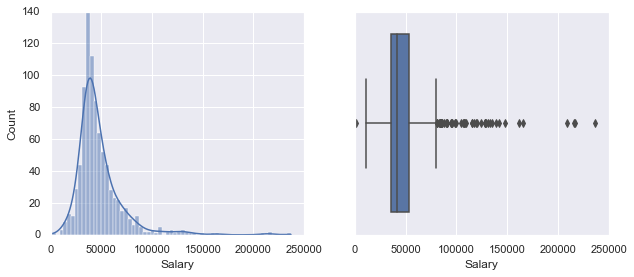

In [23]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_2['Salary'], kde=True, ax=axes[0])
sns.boxplot(x='Salary', data=df_2, ax=axes[1])



In [24]:
df_2["Salary"].describe().T

count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64

In [25]:
stats.skew(df_2.Salary)

3.097874889446042

#### Insights

* Salary : Employee salary ranges from a minimum of 1322 to maximum of 236961.

* The average Salary : Employee salary is around 47729.172.

* The standard deviation of the Salary: Employee salary is  23418.668.

* 25% , 50% (median) and 75 % of the Salary : Employee salary are 35324 , 41903.500 and 53469.500.

* Skewness indicating that the ditribution is slightly right skewed.

* Salary:Employee salary have outliers.

<AxesSubplot:xlabel='age'>

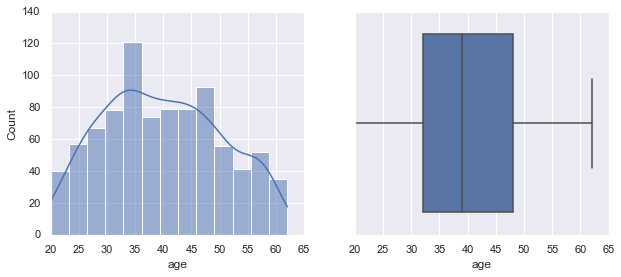

In [26]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_2['age'], kde=True, ax=axes[0])
sns.boxplot(x='age', data=df_2, ax=axes[1])

In [27]:
df_2["age"].describe().T

count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64

In [28]:
stats.skew(df_2.age)

0.14616002999431685

#### Insights

* Age : Age in years ranges from a minimum of 20 to maximum of 62.

* The average Age : Age in years is around 39.95.

* The standard deviation of the Age: Age in years is  10.55.
 
* 25% , 50% (median) and 75 % of the Age : Age in years  are 32 , 39 and 48.

* Skewness indicating that the ditribution is slightly right skewed.

* Age : Age in years don't have outliers.

<AxesSubplot:xlabel='educ'>

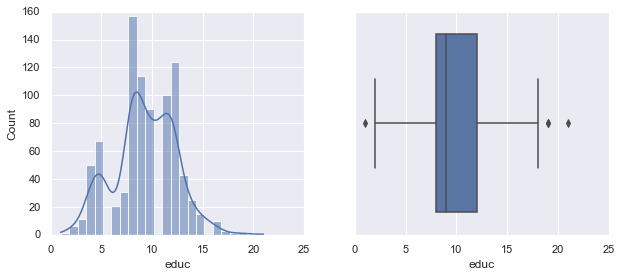

In [29]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_2['educ'], kde=True, ax=axes[0])
sns.boxplot(x='educ', data=df_2, ax=axes[1])



In [30]:
df_2["educ"].describe().T

count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: educ, dtype: float64

In [31]:
stats.skew(df_2.educ)

-0.04542316723258808

#### Insights

* Educ : Years of formal education ranges from a minimum of 1 to maximum of 62.

* The average Educ : Years of formal education  is around 9.30.

* The standard deviation of the Educ: Years of formal education is  3.03.
 
* 25% , 50% (median) and 75 % of the Educ : Years of formal  are 8 , 9 and 12.

* Skewness indicating that the ditribution is slightly left skewed.

* Educ : Years of formal education have outliers.

#### Univariate Analysis of Discrete Variables.

#### *Countplot

* A countplot is kind of like a histogram or a bar graph for Discrete & categorical variables.

In [32]:
df_2["no_young_children"].value_counts(normalize=True)

0    0.762615
1    0.168578
2    0.063073
3    0.005734
Name: no_young_children, dtype: float64

<AxesSubplot:xlabel='no_young_children', ylabel='count'>

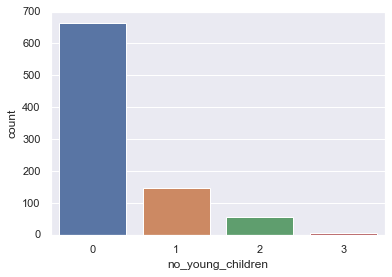

In [33]:
sns.countplot(x="no_young_children",data=df_2)

#### Insights

* 76.26% employee have 0 young children (younger than 7 years).
* 16.85% employee have 1 young children (younger than 7 years).
* 6.3%   employee have 2 young children (younger than 7 years).
* 0.57%  employee have 3 young children (younger than 7 years).

In [34]:
df_2["no_older_children"].value_counts(normalize=True)

0    0.450688
2    0.238532
1    0.227064
3    0.063073
4    0.016055
5    0.002294
6    0.002294
Name: no_older_children, dtype: float64

<AxesSubplot:xlabel='no_older_children', ylabel='count'>

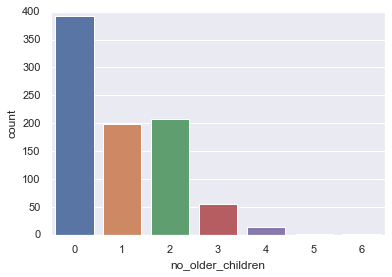

In [35]:
sns.countplot(x="no_older_children",data=df_2)

#### Insights

* 45.06% employee have 0 older children.
* 22.70% employee have 1 older children.
* 23.85% employee have 2 older children.
* 6.3%   employee have 3 older children.
* 1.6%   employee have 4 older children.
* 0.22%   employee have 5 older children.
* 0.22%  employee have 6 older children.

#### Univariate Analysis of Categorical Variables.

#### *Countplot

* A countplot is kind of like a histogram or a bar graph for categorical variables.

In [36]:
df_2["Holliday_Package"].value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

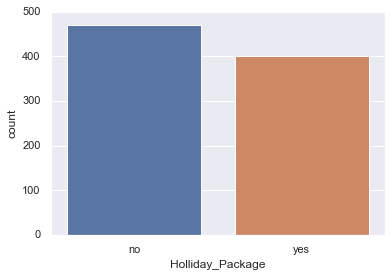

In [37]:
sns.countplot(x='Holliday_Package', data=df_2)

#### Insights

 * 54.0138% employee Opted 'no' for Holiday Package.  
 * 45.9862% employee Opted 'yes' for Holiday Package.  

In [38]:
df_2["foreign"].value_counts(normalize=True)

no     0.752294
yes    0.247706
Name: foreign, dtype: float64

<AxesSubplot:xlabel='foreign', ylabel='count'>

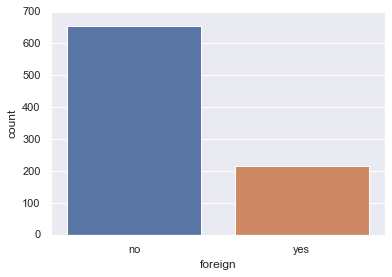

In [39]:
sns.countplot(x='foreign', data=df_2)

#### Insights

* 75.22% employee are not foreigner.
* 24.78% employee are foreigner.

#### Bivariant Analysis

#### *Scatter Plot

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

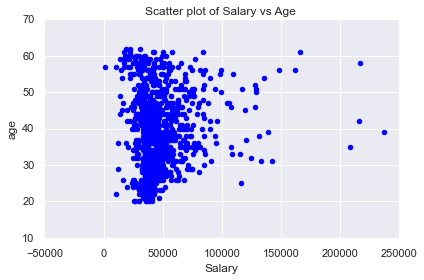

In [40]:
plt.scatter(df_2['Salary'],df_2['age'],color="blue")
plt.title("Scatter plot of Salary vs Age ")
plt.xlabel("Salary")
plt.ylabel("age")
plt.tight_layout()
plt.show()

#### Insights

* There is no such significant realtionship  between salary and age.

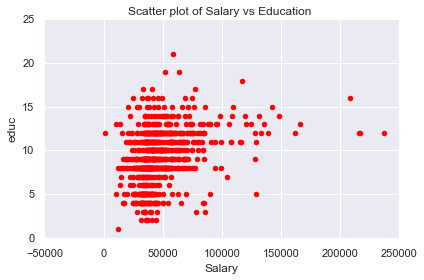

In [41]:
plt.scatter(df_2['Salary'],df_2['educ'],color="red")
plt.title("Scatter plot of Salary vs Education ")
plt.xlabel("Salary")
plt.ylabel("educ")
plt.tight_layout()
plt.show()

#### Insights

* There is weak realtion between salary and education.

#### *Countplot with Hue.

* A countplot is kind of like a histogram or a bar graph for categorical variables.

* Hue :This parameter take column name for colour encoding

<AxesSubplot:xlabel='foreign', ylabel='count'>

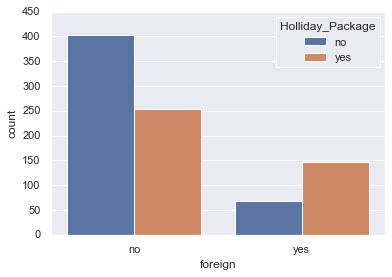

In [42]:
sns.countplot(x='foreign', hue='Holliday_Package', data=df_2)

#### Insights

* Around 61.2% employee who are not foreigner opted no for holiday package.
* Around 38.71% employee who are not foreigner opted yes for holiday package.
* Around 68.05% employee who are foreigner opted yes for holiday package.
* Around 31.94% employee who are foreigner opted no for holiday package.

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

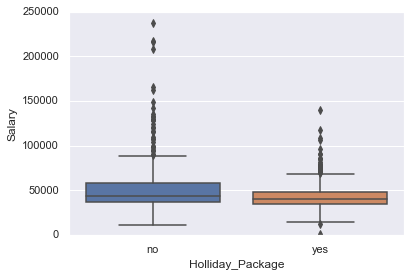

In [43]:
sns.boxplot(x='Holliday_Package', y='Salary',data=df_2)

#### Insights

* 50% employee who opted yes for the holiday package having the salary level of 40K-45K.
* 50% employee who opted no for the holiday package having the salary level of 45K-50K.
* Distribution is wider for no and lesser for yes. More Salary indicates more employee opted no for holiday package.

<AxesSubplot:xlabel='Holliday_Package', ylabel='age'>

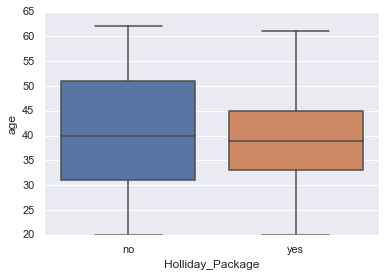

In [44]:
sns.boxplot(x='Holliday_Package', y='age',data=df_2)

#### Insights

* 50% employee who opted yes for the holiday package are in the age level of 37-38.
* 50% employee who opted no for the holiday package are in the age level of 40.
* Distribution is much wider for no and lesser for yes . More age indicates more employee opted no for holiday package.

<AxesSubplot:xlabel='Holliday_Package', ylabel='educ'>

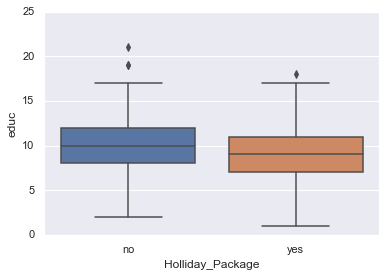

In [45]:
sns.boxplot(x='Holliday_Package', y='educ',data=df_2)

#### Insights

* Distribution is almost similar between no and yes opted for holiday package. Medians are almost same.
* 50% employee who opted no for holiday package having educ of 10.
* 50% employee who opted yes for holiday package having educ of 9.

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_young_children'>

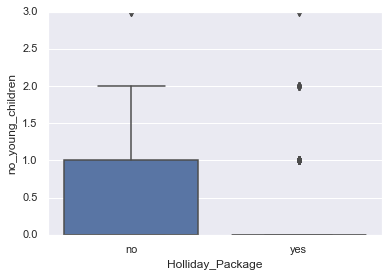

In [46]:
sns.boxplot(x='Holliday_Package', y='no_young_children',data=df_2)

#### Insights

* no_young_children shows clear distinction between no and yes opted for holiday package.Employee who has opted no for holiday pacakge shows a wider distribution indicating indicating more no_young_children. Whereas employee who has opted yes for holiday package smaller distribution (mostly near no_young_children 0) with many outliers indicating few customers who has more no_young_children still has opted yes for holiday package.

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_older_children'>

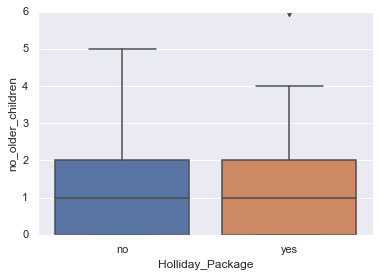

In [47]:
sns.boxplot(x='Holliday_Package', y='no_older_children',data=df_2)

#### Insights

* Distribution is almost similar between no and yes opted for holiday package.
* 50% employee who opted no and yes for holiday package have 1 no_older_children.
* 75% employee who opted no and yes for holiday package have 2 no_older_children.


#### * Heatmap

A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types.Correlation heatmaps are ideal for comparing the measurement for each pair of dimension values.Darker Shades have higher Corealtion , while lighter shades have smaller values of correaltion as compared to darker shades values.Correlation values near to 1 or -1 are highly positively correlated and highly negatively correlated respectively. Correlation values near to 0 are not correlated to each other.

#### Checking for Correlations

In [48]:
df_2.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


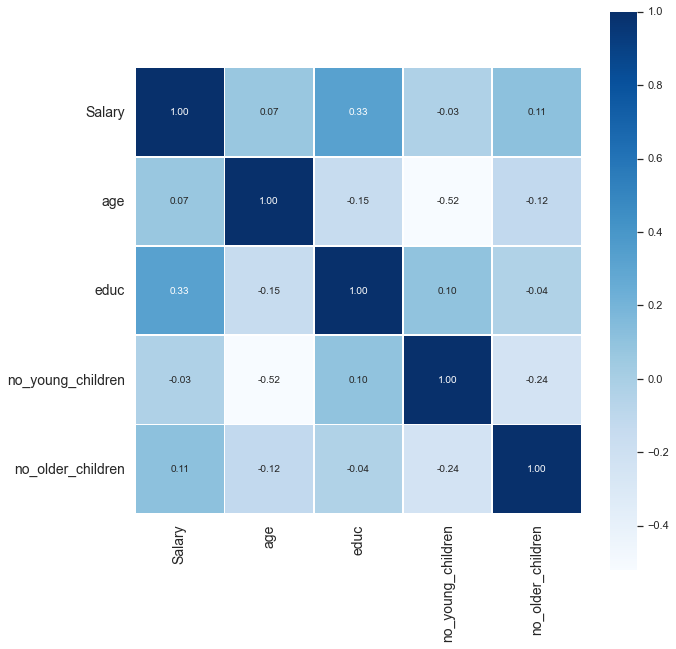

In [49]:
corr=df_2.corr()
plt.figure(figsize=(10,10)) 
sns.heatmap(corr,annot=True,cmap="Blues",linewidth=0.85,square=True,annot_kws={"size":10.10},fmt='.2f')
plt.xticks(fontsize=14)
plt.yticks(size=14)
plt.show()

#### Insights

From the above correlation table we conclude that,
* Salary with age shows weak correaltion (not so significant)i.e. 0.07.
* Salary with educ shows max correlation i.e. 0.33
* age with no_young_children shows least correlation i.e. -0.52.

#### *Pairplot

Pairplot shows the relationship between the variables in the form of scatterplot and the distribution of the variable in the form of histogram.

<Figure size 720x720 with 0 Axes>

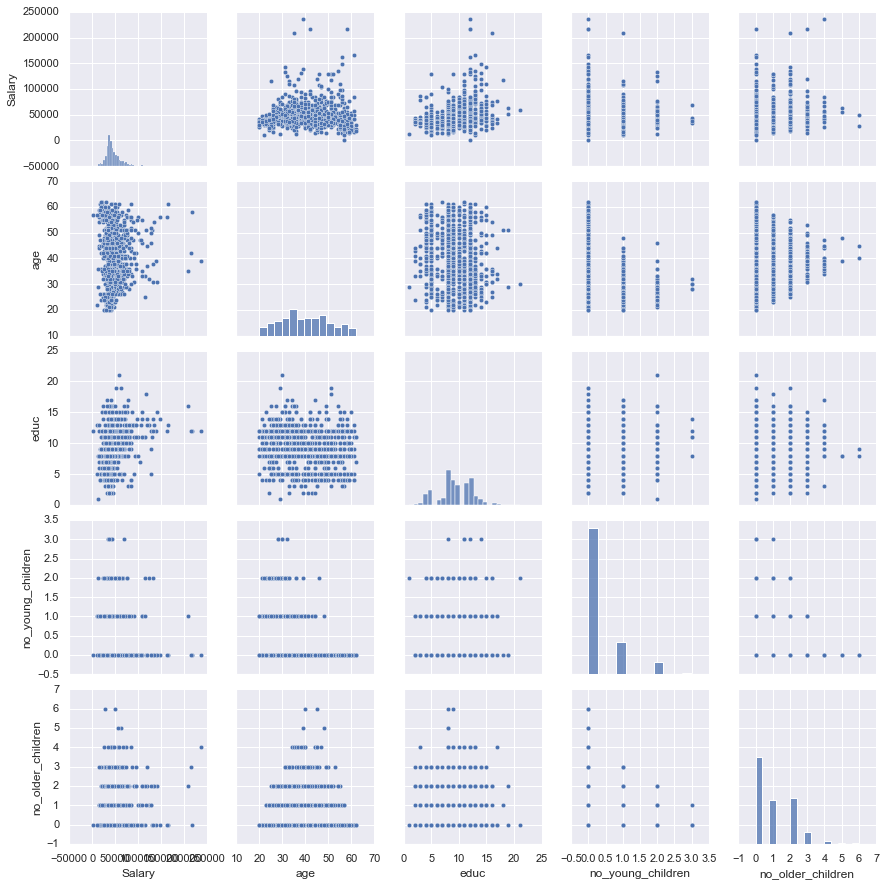

In [50]:
plt.figure(figsize=(10,10)) 
sns.pairplot(df_2)
plt.show()

#### Insights 

* There is no such strong relationship between the variables.

#### Checking for Outliers in the dataset.

To check for outliers, we will be plotting the box plots.

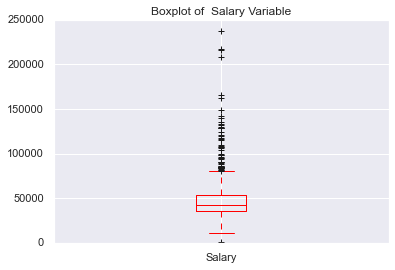

In [51]:
df_2.boxplot(column=['Salary'],color="red")
plt.title("Boxplot of  Salary Variable")
plt.show()

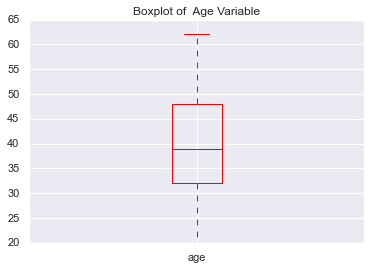

In [52]:
df_2.boxplot(column=['age'],color="red")
plt.title("Boxplot of  Age Variable")
plt.show()

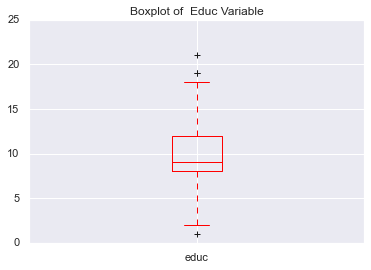

In [53]:
df_2.boxplot(column=['educ'],color="red")
plt.title("Boxplot of  Educ Variable")
plt.show()

#### Treatment of Outliers in the dataset.

In [54]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


Although outliers exists as per the boxplot, by looking at the data distribution in describe(), the values are not too far away. Treating the outliers by converting them to min/max values will cause most variables to have values to be the same. So, outliers are not treated in this case.Only salary have outliers to extereme high values so we need treat outliers of salary only.

In [55]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [56]:
lr,ur=remove_outlier(df_2['Salary'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_2['Salary']=np.where(df_2['Salary']>ur,ur,df_2['Salary'])
df_2['Salary']=np.where(df_2['Salary']<lr,lr,df_2['Salary'])

Lower Range : 8105.75 
Upper Range : 80687.75


In [57]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,45608.336869,15699.745151,8105.75,35324.0,41903.5,53469.5,80687.75
age,872.0,39.955275,10.551675,20.00,32.0,39.0,48.0,62.00
educ,872.0,9.307339,3.036259,1.00,8.0,9.0,12.0,21.00
no_young_children,872.0,0.311927,0.612870,0.00,0.0,0.0,0.0,3.00
no_older_children,872.0,0.982798,1.086786,0.00,0.0,1.0,2.0,6.00


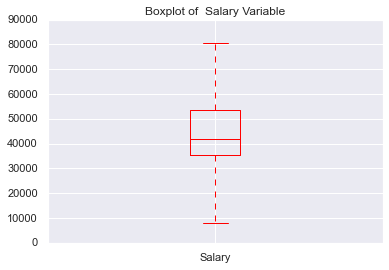

In [58]:
df_2.boxplot(column=['Salary'],color="red")
plt.title("Boxplot of  Salary Variable")
plt.show()

#### Insights

As we sucessfully treated the outliers and from the above plotted boxplot, we clearly infer that their is no more outliers present in the data.

#### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

#### ENCODING

In [59]:
df_2.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [60]:
for feature in df_2.columns: 
    if df_2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_2[feature].unique()))
        print(pd.Categorical(df_2[feature].unique()).codes)
        df_2[feature] = pd.Categorical(df_2[feature]).codes





feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


#### Checking the unique counts

In [61]:
print('Holliday_Package \n',df_2.Holliday_Package.value_counts())
print('\n')
print('foreign \n',df_2.foreign.value_counts())
print('\n')

Holliday_Package 
 0    471
1    401
Name: Holliday_Package, dtype: int64


foreign 
 0    656
1    216
Name: foreign, dtype: int64




#### Checking Original Dataset after Encoding

In [62]:
df_2.head(10)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.00,30,8,1,1,0
1,1,37207.00,45,8,0,1,0
2,0,58022.00,46,9,0,0,0
3,0,66503.00,31,11,2,0,0
4,0,66734.00,44,12,0,2,0
5,1,61590.00,42,12,0,1,0
6,0,80687.75,51,8,0,0,0
7,1,35987.00,32,8,0,2,0
8,0,41140.00,39,12,0,0,0
9,0,35826.00,43,11,0,2,0


In [63]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int8   
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    int64  
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    int64  
 6   foreign            872 non-null    int8   
dtypes: float64(1), int64(4), int8(2)
memory usage: 35.9 KB


In [64]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Holliday_Package,872.0,0.459862,0.498672,0.00,0.0,0.0,1.0,1.00
Salary,872.0,45608.336869,15699.745151,8105.75,35324.0,41903.5,53469.5,80687.75
age,872.0,39.955275,10.551675,20.00,32.0,39.0,48.0,62.00
educ,872.0,9.307339,3.036259,1.00,8.0,9.0,12.0,21.00
no_young_children,872.0,0.311927,0.612870,0.00,0.0,0.0,0.0,3.00
no_older_children,872.0,0.982798,1.086786,0.00,0.0,1.0,2.0,6.00
foreign,872.0,0.247706,0.431928,0.00,0.0,0.0,0.0,1.00


#### Result

* Label Encoding has been done for categorical columns and all columns are now in number.

* After performing EDA , various data preprocessing & data preparation steps. Our dataset is now ready for supervised modelling algorithms like Logistic Regression & LDA (Linear Discriminant Analysis).

#### Proportion of 1s and 0s.

In [65]:
df_2.Holliday_Package.value_counts(normalize=True)

0    0.540138
1    0.459862
Name: Holliday_Package, dtype: float64

There is no issue of class imbalance here as we have reasonable proportions in both the classes.

#### Extracting the target column into separate vectors for training set and test set

In [66]:
X = df_2.drop("Holliday_Package", axis=1)

y = df_2.pop("Holliday_Package")

Separating the independent and target columns.

#### Splitting data into training and test set in 70:30 ratio.

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

#### Checking the dimensions of the training and test data.

In [68]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (610, 6)
X_test (262, 6)
train_labels (610,)
test_labels (262,)


#### Building a Logistic Regression Model

#### Grid Search for finding out the optimal values for the hyper parameters

In [69]:
param_grid ={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001]}

model = LogisticRegression(max_iter=10000,n_jobs=-1)

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5,n_jobs=-1,scoring='f1')


In [70]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}


LogisticRegression(max_iter=10000, n_jobs=-1, solver='newton-cg')

#### Building a LDA Model.

In [90]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,train_labels)

#### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

#### Logistics Regression Model

#### Predicting on Training and Test dataset

In [71]:
lr_ytrain_predict = best_grid.predict(X_train)
lr_ytest_predict = best_grid.predict(X_test)

In [72]:
lr_ytrain_predict

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [73]:
lr_ytest_predict

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=int8)

#### Getting the Predicted Probability

In [74]:
lr_ytrain_predict_prob=best_grid.predict_proba(X_train)
lr_ytrain_predict_prob
pd.DataFrame(lr_ytrain_predict_prob).head()

,0,1
0,0.731299,0.268701
1,0.269331,0.730669
2,0.950614,0.049386
3,0.690274,0.309726
4,0.448412,0.551588


In [75]:
lr_ytest_predict_prob=best_grid.predict_proba(X_test)
lr_ytest_predict_prob
pd.DataFrame(lr_ytest_predict_prob).head()

,0,1
0,0.767056,0.232944
1,0.286662,0.713338
2,0.888828,0.111172
3,0.952326,0.047674
4,0.498776,0.501224


#### Model Evaluation

#### AUC and ROC for the Training Data

AUC: 0.741


Text(0, 0.5, 'True Positive Rate')

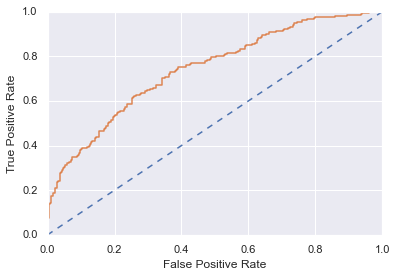

In [76]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### Confusion Matrix for the Training Data

In [77]:
lr_confusion_matrix_train=confusion_matrix(train_labels, lr_ytrain_predict)

In [78]:
lr_confusion_matrix_train

array([[251,  75],
       [124, 160]])

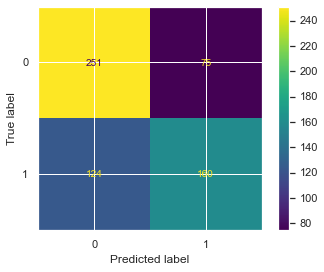

In [79]:
plot_confusion_matrix(best_grid,X_train,train_labels)

#### Train Data Accuracy

In [80]:
lr_train_acc=best_grid.score(X_train,train_labels)
lr_train_acc

0.6737704918032786

#### Classification Report

In [81]:
print(classification_report(train_labels, lr_ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.62       284

    accuracy                           0.67       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.67      0.67      0.67       610



In [82]:
lr_metrics=classification_report(train_labels, lr_ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.68
lr_train_recall  0.56
lr_train_f1  0.62


#### AUC and ROC for the Test Data

AUC: 0.705


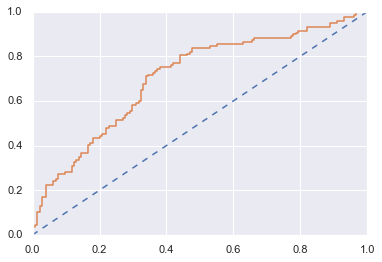

In [83]:
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr)

#### Confusion Matrix for Test Data

In [84]:
lr_confusion_matrix_test=confusion_matrix(test_labels, lr_ytest_predict)

In [85]:
lr_confusion_matrix_test

array([[102,  43],
       [ 50,  67]])

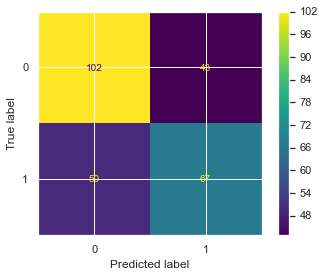

In [86]:
plot_confusion_matrix(best_grid,X_test,test_labels)

#### Test Data Accuracy

In [87]:
lr_test_acc=best_grid.score(X_test,test_labels)
lr_test_acc

0.6450381679389313

#### Classifiaction Report

In [88]:
print(classification_report(test_labels, lr_ytest_predict))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       145
           1       0.61      0.57      0.59       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.65      0.64       262



In [89]:
lr_metrics=classification_report(test_labels, lr_ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_precision=round(df.loc["1"][0],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_f1=round(df.loc["1"][2],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.61
lr_test_recall  0.57
lr_test_f1  0.59


#### Logistic Regression Model Conclusion:

Train Data:

* AUC: 74.1%

* Accuracy: 67.37%

* Precision: 68%

* Recall: 56%    

* f1-Score: 62%

Test Data:

* AUC: 70.5%

* Accuracy: 65%

* Precision: 61%

* Recall: 57%    

* f1-Score: 59%

#### LDA Model

#### Predicting the Training and Testing data

In [91]:
lda_ytrain_predict = model.predict(X_train)
lda_ytest_predict = model.predict(X_test)

In [92]:
lda_ytrain_predict

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [93]:
lda_ytest_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=int8)

#### Getting the Predicted Probability 

In [94]:
lda_ytrain_predict
lda_ytrain_predict_prob=model.predict_proba(X_train)
lda_ytrain_predict_prob
pd.DataFrame(lda_ytrain_predict_prob).head()

,0,1
0,0.751451,0.248549
1,0.247976,0.752024
2,0.949134,0.050866
3,0.696704,0.303296
4,0.453222,0.546778


In [95]:
lda_ytest_predict
lda_ytest_predict_prob=model.predict_proba(X_test)
lda_ytest_predict_prob
pd.DataFrame(lda_ytest_predict_prob).head()

,0,1
0,0.764441,0.235559
1,0.277406,0.722594
2,0.887380,0.112620
3,0.950494,0.049506
4,0.508190,0.491810


####  Model Evaluation 

#### AUC and ROC for the Training Data

AUC: 0.739


Text(0, 0.5, 'True Positive Rate')

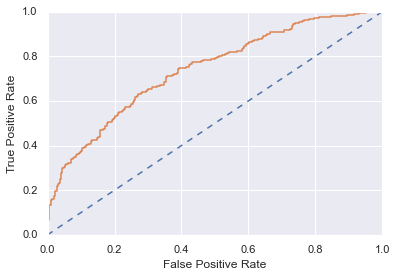

In [96]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### Confusion Matrix for the Training Data

In [97]:
lda_confusion_matrix_train=confusion_matrix(train_labels, lda_ytrain_predict)

In [98]:
lda_confusion_matrix_train

array([[254,  72],
       [126, 158]])

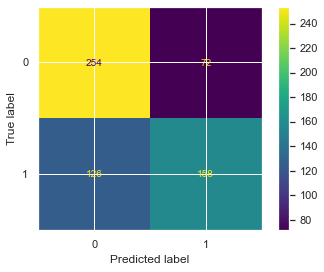

In [99]:
plot_confusion_matrix(model,X_train,train_labels)

#### Train Data Accuracy

In [100]:
lda_train_acc=model.score(X_train,train_labels)
lda_train_acc

0.6754098360655738

#### Classification Report

In [101]:
print(classification_report(train_labels, lda_ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.61       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



In [102]:
lda_metrics=classification_report(train_labels, lda_ytrain_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.69
lda_train_recall  0.56
lda_train_f1  0.61


#### AUC and ROC for the Test Data

AUC: 0.705


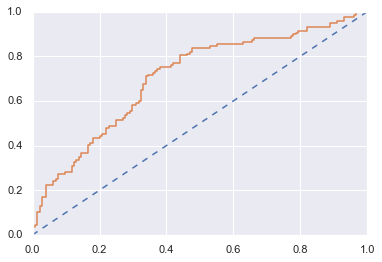

In [103]:
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

#### Confusion Matrix for Test Data

In [104]:
lda_confusion_matrix_test=confusion_matrix(test_labels, lda_ytest_predict)
lda_confusion_matrix_test

array([[103,  42],
       [ 52,  65]])

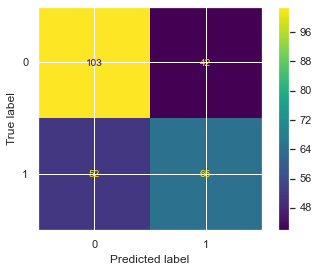

In [105]:
plot_confusion_matrix(model,X_test,test_labels)

#### Test Data Accuracy

In [106]:
lda_test_acc=model.score(X_test,test_labels)
lda_test_acc

0.6412213740458015

#### Classifiaction Report

In [107]:
print(classification_report(test_labels, lda_ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [108]:
lda_metrics=classification_report(test_labels, lda_ytest_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_precision=round(df.loc["1"][0],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_f1=round(df.loc["1"][2],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.61
lda_test_recall  0.56
lda_test_f1  0.58


#### LDA Conclusion:

Train Data:

* AUC: 74%

* Accuracy: 68%

* Precision: 69%

* Recall:56%    

* f1-Score: 61%

Test Data:

* AUC:  70.5%

* Accuracy: 64%

* Precision: 61%

* Recall:56%    

* f1-Score: 58%

#### Comparison of the performance metrics from the 2 models

In [109]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Regression Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'Logistic Regression Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
        'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
round(data,2)

,Logistic Regression Train,Logistic Regression Test,LDA Train,LDA Test
Accuracy,0.67,0.65,0.68,0.64
AUC,0.74,0.70,0.74,0.70
Recall,0.56,0.57,0.56,0.56
Precision,0.68,0.61,0.69,0.61
F1 Score,0.62,0.59,0.61,0.58


#### ROC Curve for the 2 models on the Training data

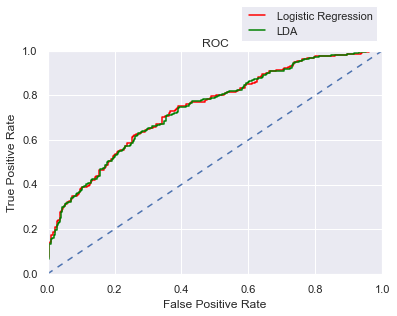

In [110]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr,color='red',label="Logistic Regression")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#### ROC Curve for the 2 models on the Test data

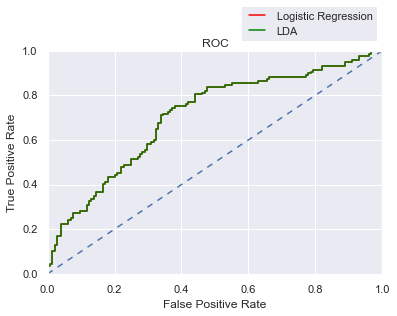

In [111]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr,lr_test_tpr,color='red',label="Logistic Regression")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#### How to change the cut-off values for maximum accuracy?

We will do this exercise only on the training data.

0.1 

Accuracy Score 0.4836 

F1 Score 0.6425 

Recall Score 0.9965 

Precision Score 0.474 

Confusion Matrix


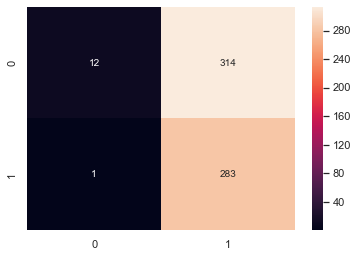

0.2 

Accuracy Score 0.5328 

F1 Score 0.6611 

Recall Score 0.9789 

Precision Score 0.4991 

Confusion Matrix


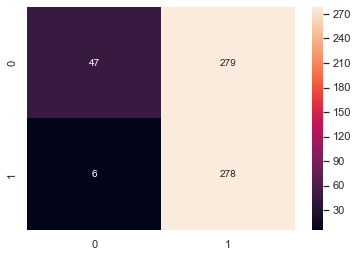

0.3 

Accuracy Score 0.6 

F1 Score 0.6755 

Recall Score 0.8944 

Precision Score 0.5427 

Confusion Matrix


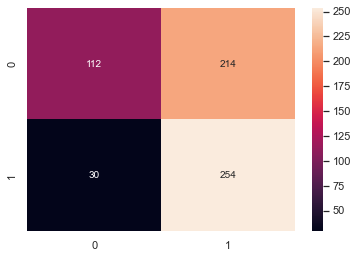

0.4 

Accuracy Score 0.6656 

F1 Score 0.6699 

Recall Score 0.7289 

Precision Score 0.6198 

Confusion Matrix


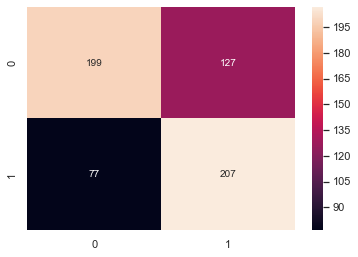

0.5 

Accuracy Score 0.6754 

F1 Score 0.6148 

Recall Score 0.5563 

Precision Score 0.687 

Confusion Matrix


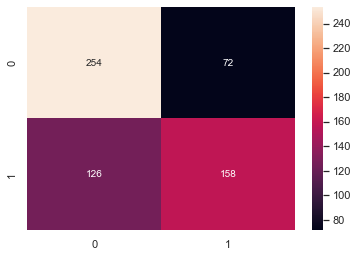

0.6 

Accuracy Score 0.659 

F1 Score 0.5378 

Recall Score 0.4261 

Precision Score 0.7289 

Confusion Matrix


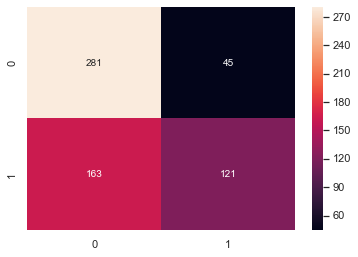

0.7 

Accuracy Score 0.6492 

F1 Score 0.4596 

Recall Score 0.3204 

Precision Score 0.8125 

Confusion Matrix


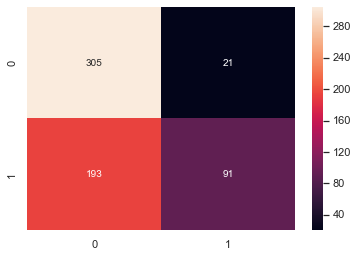

0.8 

Accuracy Score 0.6033 

F1 Score 0.2754 

Recall Score 0.162 

Precision Score 0.92 

Confusion Matrix


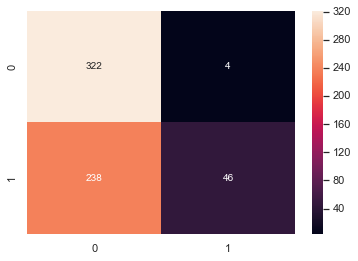

0.9 

Accuracy Score 0.5443 

F1 Score 0.0414 

Recall Score 0.0211 

Precision Score 1.0 

Confusion Matrix


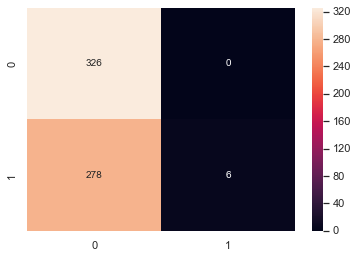

In [112]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j       #defining the cut-off value of our choice
    custom_cutoff_data=[] #defining an empty list
    for i in range(0,len(train_labels)): #defining a loop for the length of the test data
        if np.array(lda_ytrain_predict_prob[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
                                                           #greater than the custom cutoff value
            a=1 #if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0 #if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a) #adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(train_labels,custom_cutoff_data),4),'\n')
    print('F1 Score',round(metrics.f1_score(train_labels,custom_cutoff_data),4),'\n')
    print('Recall Score',round(metrics.recall_score(train_labels,custom_cutoff_data),4),'\n')
    print('Precision Score',round(metrics.precision_score(train_labels,custom_cutoff_data),4),'\n')    
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(train_labels,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [113]:
#Predicting the classes on the Train data

data_pred_custom_cutoff=[]
for i in range(0,len(lda_ytrain_predict_prob[:,1])):
    if np.array(lda_ytrain_predict_prob[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

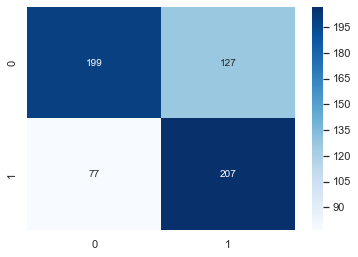

In [114]:
sns.heatmap((metrics.confusion_matrix(train_labels,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Blues');

In [115]:
print('Classification Report of the default cut-off train data:\n\n',metrics.classification_report(train_labels,lda_ytrain_predict),'\n\n\n')
print('Classification Report of the custom cut-off train data:\n\n',metrics.classification_report(train_labels,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off train data:

               precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.61       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610
 



Classification Report of the custom cut-off train data:

               precision    recall  f1-score   support

           0       0.72      0.61      0.66       326
           1       0.62      0.73      0.67       284

    accuracy                           0.67       610
   macro avg       0.67      0.67      0.67       610
weighted avg       0.67      0.67      0.67       610
 



In [116]:
lda_metrics=classification_report(train_labels, lda_ytrain_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.69
lda_train_recall  0.56
lda_train_f1  0.61


In [117]:
#Predicting the classes on the test data
data_pred_custom_cutoff=[]
for i in range(0,len(lda_ytest_predict_prob[:,1])):
    if np.array(lda_ytest_predict_prob[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

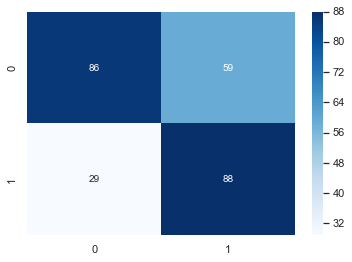

In [118]:
sns.heatmap((metrics.confusion_matrix(test_labels,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Blues');

In [119]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(test_labels,lda_ytest_predict),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(test_labels,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.75      0.59      0.66       145
           1       0.60      0.75      0.67       117

    accuracy                           0.66       262
   macro avg       0.67      0.67      0.66       262
weighted avg       0.68      0.66      0.66       262
 



#### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

* Insights :

In the given business problem we need to predict whether an employee would like to opt for a Holiday Package or not based on some given key factors.
We have carried out some predictions using both Logistic Regression and Linear discriminant analysis.
And found that both are giving us similar results.
The EDA analysis clearly indicates that Employees that are aged above 50 are not considering the Holiday packages available.
Whereas employees in the range from 35 to 50 are generally opting for holiday packages and even if the Salary is less than 50000 they have opted for Holiday packages.
Majorly the factors influencing the predictions are Salary, Age and Education



* Recommendations :

For older age group they can add some new trip packages like Special packages to religious destinations and it might get the required traction
Also for Employees having higher Salary package like above 150000, they can introduce some special offers on Holiday packages
Employees having more number of Older children can be suggested and given some special packages with great discount for vacations.

-------------------The End--------------